In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# 读入训练数据
train = np.loadtxt('images2.csv', delimiter=',', skiprows=1)
train_x = train[:,:2]
train_y = train[:,2]

# 特征标准化（ x - 减去均值 / 标准差 )
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
def standardize(x):
    return (x - mean) / std
train_x = standardize(train_x)
train_x

array([[-0.99163844,  1.10606278],
       [-0.54781896, -0.33533755],
       [-1.22348444, -0.74232117],
       [ 1.13472054,  0.69907916],
       [ 1.20758642,  0.92800744],
       [-0.46170474,  1.08910513],
       [ 0.61803518,  0.16491315],
       [ 1.20096225,  0.40232027],
       [ 0.83663283, -0.36077402],
       [-0.11062366, -0.69144821],
       [ 0.63790769,  1.1145416 ],
       [ 0.66440438, -0.01314218],
       [-0.33584548, -2.26850974],
       [ 1.28707648,  0.59733325],
       [ 0.50542427,  0.97040157],
       [-1.50169963, -1.17474126],
       [-0.2629796 , -1.60716136],
       [-1.83290819, -0.9203765 ],
       [-1.6010622 ,  1.45369462],
       [ 0.77701529, -0.41164697]])

In [168]:
# 逻辑回归函数
theta_0 = np.random.rand()
theta_1 = np.random.rand()
theta_2 = np.random.rand()
theta_3 = np.random.rand()
def f(x):
    return 1/(1+np.exp(-1*(theta_0+theta_1*x[:,0]+theta_2*x[:,1]+theta_3*x[:,0]**2)))

In [169]:
# 训练参数
learning_rate = 0.001
# 训练轮数
epoch = 100000

In [170]:
# 开始训练
for i in range(epoch):
    # 随机批量梯度
    idx = np.random.randint(0,len(train_x))
    x = train_x[idx:idx+4]
    y = train_y[idx:idx+4]
    theta_0 = theta_0 + learning_rate * np.sum((y-f(x))*1)
    theta_1 = theta_1 + learning_rate * np.sum((y-f(x))*x[:,0])
    theta_2 = theta_2 + learning_rate * np.sum((y-f(x))*x[:,1])
    theta_3 = theta_3 + learning_rate * np.sum((y-f(x))*x[:,0]**2)
    
    # 预测训练集
    predict_y = f(train_x)
    predict_y[predict_y>=0.5] = 1
    predict_y[predict_y<0.5] = 0
    
    # 计算准确率
    acc = (predict_y==train_y).sum() / len(train_y)
    print('轮数:%d 精确率:%.2f' % (i, acc*100))

轮数:0 精确率:60.00
轮数:1 精确率:60.00
轮数:2 精确率:60.00
轮数:3 精确率:60.00
轮数:4 精确率:60.00
轮数:5 精确率:60.00
轮数:6 精确率:60.00
轮数:7 精确率:60.00
轮数:8 精确率:60.00
轮数:9 精确率:60.00
轮数:10 精确率:60.00
轮数:11 精确率:60.00
轮数:12 精确率:60.00
轮数:13 精确率:60.00
轮数:14 精确率:60.00
轮数:15 精确率:60.00
轮数:16 精确率:60.00
轮数:17 精确率:60.00
轮数:18 精确率:60.00
轮数:19 精确率:60.00
轮数:20 精确率:60.00
轮数:21 精确率:60.00
轮数:22 精确率:60.00
轮数:23 精确率:60.00
轮数:24 精确率:60.00
轮数:25 精确率:60.00
轮数:26 精确率:60.00
轮数:27 精确率:60.00
轮数:28 精确率:60.00
轮数:29 精确率:65.00
轮数:30 精确率:65.00
轮数:31 精确率:65.00
轮数:32 精确率:65.00
轮数:33 精确率:65.00
轮数:34 精确率:65.00
轮数:35 精确率:65.00
轮数:36 精确率:65.00
轮数:37 精确率:65.00
轮数:38 精确率:65.00
轮数:39 精确率:65.00
轮数:40 精确率:65.00
轮数:41 精确率:65.00
轮数:42 精确率:65.00
轮数:43 精确率:65.00
轮数:44 精确率:65.00
轮数:45 精确率:65.00
轮数:46 精确率:65.00
轮数:47 精确率:65.00
轮数:48 精确率:65.00
轮数:49 精确率:65.00
轮数:50 精确率:65.00
轮数:51 精确率:65.00
轮数:52 精确率:65.00
轮数:53 精确率:65.00
轮数:54 精确率:65.00
轮数:55 精确率:65.00
轮数:56 精确率:65.00
轮数:57 精确率:65.00
轮数:58 精确率:65.00
轮数:59 精确率:65.00
轮数:60 精确率:65.00
轮数:61 精确率:65.00
轮数:62 精确率:65.00
轮数

轮数:1174 精确率:90.00
轮数:1175 精确率:90.00
轮数:1176 精确率:90.00
轮数:1177 精确率:90.00
轮数:1178 精确率:90.00
轮数:1179 精确率:90.00
轮数:1180 精确率:90.00
轮数:1181 精确率:90.00
轮数:1182 精确率:90.00
轮数:1183 精确率:90.00
轮数:1184 精确率:90.00
轮数:1185 精确率:90.00
轮数:1186 精确率:90.00
轮数:1187 精确率:90.00
轮数:1188 精确率:90.00
轮数:1189 精确率:90.00
轮数:1190 精确率:90.00
轮数:1191 精确率:90.00
轮数:1192 精确率:90.00
轮数:1193 精确率:90.00
轮数:1194 精确率:90.00
轮数:1195 精确率:90.00
轮数:1196 精确率:90.00
轮数:1197 精确率:90.00
轮数:1198 精确率:90.00
轮数:1199 精确率:90.00
轮数:1200 精确率:90.00
轮数:1201 精确率:90.00
轮数:1202 精确率:90.00
轮数:1203 精确率:90.00
轮数:1204 精确率:90.00
轮数:1205 精确率:90.00
轮数:1206 精确率:90.00
轮数:1207 精确率:90.00
轮数:1208 精确率:90.00
轮数:1209 精确率:90.00
轮数:1210 精确率:90.00
轮数:1211 精确率:90.00
轮数:1212 精确率:90.00
轮数:1213 精确率:90.00
轮数:1214 精确率:90.00
轮数:1215 精确率:90.00
轮数:1216 精确率:90.00
轮数:1217 精确率:90.00
轮数:1218 精确率:90.00
轮数:1219 精确率:90.00
轮数:1220 精确率:90.00
轮数:1221 精确率:90.00
轮数:1222 精确率:90.00
轮数:1223 精确率:90.00
轮数:1224 精确率:90.00
轮数:1225 精确率:90.00
轮数:1226 精确率:90.00
轮数:1227 精确率:90.00
轮数:1228 精确率:90.00
轮数:1229 精确

轮数:2328 精确率:90.00
轮数:2329 精确率:90.00
轮数:2330 精确率:90.00
轮数:2331 精确率:90.00
轮数:2332 精确率:90.00
轮数:2333 精确率:90.00
轮数:2334 精确率:90.00
轮数:2335 精确率:90.00
轮数:2336 精确率:90.00
轮数:2337 精确率:90.00
轮数:2338 精确率:90.00
轮数:2339 精确率:90.00
轮数:2340 精确率:90.00
轮数:2341 精确率:90.00
轮数:2342 精确率:90.00
轮数:2343 精确率:90.00
轮数:2344 精确率:90.00
轮数:2345 精确率:90.00
轮数:2346 精确率:90.00
轮数:2347 精确率:90.00
轮数:2348 精确率:90.00
轮数:2349 精确率:90.00
轮数:2350 精确率:90.00
轮数:2351 精确率:90.00
轮数:2352 精确率:90.00
轮数:2353 精确率:90.00
轮数:2354 精确率:90.00
轮数:2355 精确率:90.00
轮数:2356 精确率:90.00
轮数:2357 精确率:90.00
轮数:2358 精确率:90.00
轮数:2359 精确率:90.00
轮数:2360 精确率:90.00
轮数:2361 精确率:90.00
轮数:2362 精确率:90.00
轮数:2363 精确率:90.00
轮数:2364 精确率:90.00
轮数:2365 精确率:90.00
轮数:2366 精确率:90.00
轮数:2367 精确率:90.00
轮数:2368 精确率:90.00
轮数:2369 精确率:90.00
轮数:2370 精确率:90.00
轮数:2371 精确率:90.00
轮数:2372 精确率:90.00
轮数:2373 精确率:90.00
轮数:2374 精确率:90.00
轮数:2375 精确率:90.00
轮数:2376 精确率:90.00
轮数:2377 精确率:90.00
轮数:2378 精确率:90.00
轮数:2379 精确率:90.00
轮数:2380 精确率:90.00
轮数:2381 精确率:90.00
轮数:2382 精确率:90.00
轮数:2383 精确

轮数:3488 精确率:90.00
轮数:3489 精确率:90.00
轮数:3490 精确率:90.00
轮数:3491 精确率:90.00
轮数:3492 精确率:90.00
轮数:3493 精确率:90.00
轮数:3494 精确率:90.00
轮数:3495 精确率:90.00
轮数:3496 精确率:90.00
轮数:3497 精确率:90.00
轮数:3498 精确率:90.00
轮数:3499 精确率:90.00
轮数:3500 精确率:90.00
轮数:3501 精确率:90.00
轮数:3502 精确率:90.00
轮数:3503 精确率:90.00
轮数:3504 精确率:90.00
轮数:3505 精确率:90.00
轮数:3506 精确率:90.00
轮数:3507 精确率:90.00
轮数:3508 精确率:90.00
轮数:3509 精确率:90.00
轮数:3510 精确率:90.00
轮数:3511 精确率:90.00
轮数:3512 精确率:90.00
轮数:3513 精确率:90.00
轮数:3514 精确率:90.00
轮数:3515 精确率:90.00
轮数:3516 精确率:90.00
轮数:3517 精确率:90.00
轮数:3518 精确率:90.00
轮数:3519 精确率:90.00
轮数:3520 精确率:90.00
轮数:3521 精确率:90.00
轮数:3522 精确率:90.00
轮数:3523 精确率:90.00
轮数:3524 精确率:90.00
轮数:3525 精确率:90.00
轮数:3526 精确率:90.00
轮数:3527 精确率:90.00
轮数:3528 精确率:90.00
轮数:3529 精确率:90.00
轮数:3530 精确率:90.00
轮数:3531 精确率:90.00
轮数:3532 精确率:90.00
轮数:3533 精确率:90.00
轮数:3534 精确率:90.00
轮数:3535 精确率:90.00
轮数:3536 精确率:90.00
轮数:3537 精确率:90.00
轮数:3538 精确率:90.00
轮数:3539 精确率:90.00
轮数:3540 精确率:90.00
轮数:3541 精确率:90.00
轮数:3542 精确率:90.00
轮数:3543 精确

轮数:4590 精确率:90.00
轮数:4591 精确率:90.00
轮数:4592 精确率:90.00
轮数:4593 精确率:90.00
轮数:4594 精确率:90.00
轮数:4595 精确率:90.00
轮数:4596 精确率:90.00
轮数:4597 精确率:90.00
轮数:4598 精确率:90.00
轮数:4599 精确率:90.00
轮数:4600 精确率:90.00
轮数:4601 精确率:90.00
轮数:4602 精确率:90.00
轮数:4603 精确率:90.00
轮数:4604 精确率:90.00
轮数:4605 精确率:90.00
轮数:4606 精确率:90.00
轮数:4607 精确率:90.00
轮数:4608 精确率:90.00
轮数:4609 精确率:90.00
轮数:4610 精确率:90.00
轮数:4611 精确率:90.00
轮数:4612 精确率:90.00
轮数:4613 精确率:90.00
轮数:4614 精确率:90.00
轮数:4615 精确率:90.00
轮数:4616 精确率:90.00
轮数:4617 精确率:90.00
轮数:4618 精确率:90.00
轮数:4619 精确率:90.00
轮数:4620 精确率:90.00
轮数:4621 精确率:90.00
轮数:4622 精确率:90.00
轮数:4623 精确率:90.00
轮数:4624 精确率:90.00
轮数:4625 精确率:90.00
轮数:4626 精确率:90.00
轮数:4627 精确率:90.00
轮数:4628 精确率:90.00
轮数:4629 精确率:90.00
轮数:4630 精确率:90.00
轮数:4631 精确率:90.00
轮数:4632 精确率:90.00
轮数:4633 精确率:90.00
轮数:4634 精确率:90.00
轮数:4635 精确率:90.00
轮数:4636 精确率:90.00
轮数:4637 精确率:90.00
轮数:4638 精确率:90.00
轮数:4639 精确率:90.00
轮数:4640 精确率:90.00
轮数:4641 精确率:90.00
轮数:4642 精确率:90.00
轮数:4643 精确率:90.00
轮数:4644 精确率:90.00
轮数:4645 精确

轮数:5743 精确率:90.00
轮数:5744 精确率:90.00
轮数:5745 精确率:90.00
轮数:5746 精确率:90.00
轮数:5747 精确率:90.00
轮数:5748 精确率:90.00
轮数:5749 精确率:90.00
轮数:5750 精确率:90.00
轮数:5751 精确率:90.00
轮数:5752 精确率:90.00
轮数:5753 精确率:90.00
轮数:5754 精确率:90.00
轮数:5755 精确率:90.00
轮数:5756 精确率:90.00
轮数:5757 精确率:90.00
轮数:5758 精确率:90.00
轮数:5759 精确率:90.00
轮数:5760 精确率:90.00
轮数:5761 精确率:90.00
轮数:5762 精确率:90.00
轮数:5763 精确率:90.00
轮数:5764 精确率:90.00
轮数:5765 精确率:90.00
轮数:5766 精确率:90.00
轮数:5767 精确率:90.00
轮数:5768 精确率:90.00
轮数:5769 精确率:90.00
轮数:5770 精确率:90.00
轮数:5771 精确率:90.00
轮数:5772 精确率:95.00
轮数:5773 精确率:95.00
轮数:5774 精确率:95.00
轮数:5775 精确率:95.00
轮数:5776 精确率:95.00
轮数:5777 精确率:95.00
轮数:5778 精确率:95.00
轮数:5779 精确率:90.00
轮数:5780 精确率:90.00
轮数:5781 精确率:90.00
轮数:5782 精确率:95.00
轮数:5783 精确率:95.00
轮数:5784 精确率:95.00
轮数:5785 精确率:95.00
轮数:5786 精确率:95.00
轮数:5787 精确率:95.00
轮数:5788 精确率:95.00
轮数:5789 精确率:95.00
轮数:5790 精确率:90.00
轮数:5791 精确率:95.00
轮数:5792 精确率:95.00
轮数:5793 精确率:95.00
轮数:5794 精确率:95.00
轮数:5795 精确率:95.00
轮数:5796 精确率:95.00
轮数:5797 精确率:95.00
轮数:5798 精确

轮数:6898 精确率:100.00
轮数:6899 精确率:100.00
轮数:6900 精确率:100.00
轮数:6901 精确率:100.00
轮数:6902 精确率:100.00
轮数:6903 精确率:100.00
轮数:6904 精确率:100.00
轮数:6905 精确率:100.00
轮数:6906 精确率:100.00
轮数:6907 精确率:100.00
轮数:6908 精确率:100.00
轮数:6909 精确率:100.00
轮数:6910 精确率:100.00
轮数:6911 精确率:100.00
轮数:6912 精确率:100.00
轮数:6913 精确率:100.00
轮数:6914 精确率:100.00
轮数:6915 精确率:100.00
轮数:6916 精确率:100.00
轮数:6917 精确率:100.00
轮数:6918 精确率:100.00
轮数:6919 精确率:100.00
轮数:6920 精确率:100.00
轮数:6921 精确率:100.00
轮数:6922 精确率:100.00
轮数:6923 精确率:100.00
轮数:6924 精确率:100.00
轮数:6925 精确率:100.00
轮数:6926 精确率:100.00
轮数:6927 精确率:100.00
轮数:6928 精确率:100.00
轮数:6929 精确率:100.00
轮数:6930 精确率:100.00
轮数:6931 精确率:100.00
轮数:6932 精确率:100.00
轮数:6933 精确率:100.00
轮数:6934 精确率:100.00
轮数:6935 精确率:100.00
轮数:6936 精确率:100.00
轮数:6937 精确率:100.00
轮数:6938 精确率:100.00
轮数:6939 精确率:100.00
轮数:6940 精确率:100.00
轮数:6941 精确率:100.00
轮数:6942 精确率:100.00
轮数:6943 精确率:100.00
轮数:6944 精确率:100.00
轮数:6945 精确率:100.00
轮数:6946 精确率:100.00
轮数:6947 精确率:100.00
轮数:6948 精确率:100.00
轮数:6949 精确率:100.00
轮数:6950 精确率:

轮数:8042 精确率:100.00
轮数:8043 精确率:100.00
轮数:8044 精确率:100.00
轮数:8045 精确率:100.00
轮数:8046 精确率:100.00
轮数:8047 精确率:100.00
轮数:8048 精确率:100.00
轮数:8049 精确率:100.00
轮数:8050 精确率:100.00
轮数:8051 精确率:100.00
轮数:8052 精确率:100.00
轮数:8053 精确率:100.00
轮数:8054 精确率:100.00
轮数:8055 精确率:100.00
轮数:8056 精确率:100.00
轮数:8057 精确率:100.00
轮数:8058 精确率:100.00
轮数:8059 精确率:100.00
轮数:8060 精确率:100.00
轮数:8061 精确率:100.00
轮数:8062 精确率:100.00
轮数:8063 精确率:100.00
轮数:8064 精确率:100.00
轮数:8065 精确率:100.00
轮数:8066 精确率:100.00
轮数:8067 精确率:100.00
轮数:8068 精确率:100.00
轮数:8069 精确率:100.00
轮数:8070 精确率:100.00
轮数:8071 精确率:100.00
轮数:8072 精确率:100.00
轮数:8073 精确率:100.00
轮数:8074 精确率:100.00
轮数:8075 精确率:100.00
轮数:8076 精确率:100.00
轮数:8077 精确率:100.00
轮数:8078 精确率:100.00
轮数:8079 精确率:100.00
轮数:8080 精确率:100.00
轮数:8081 精确率:100.00
轮数:8082 精确率:100.00
轮数:8083 精确率:100.00
轮数:8084 精确率:100.00
轮数:8085 精确率:100.00
轮数:8086 精确率:100.00
轮数:8087 精确率:100.00
轮数:8088 精确率:100.00
轮数:8089 精确率:100.00
轮数:8090 精确率:100.00
轮数:8091 精确率:100.00
轮数:8092 精确率:100.00
轮数:8093 精确率:100.00
轮数:8094 精确率:

轮数:9198 精确率:100.00
轮数:9199 精确率:100.00
轮数:9200 精确率:100.00
轮数:9201 精确率:100.00
轮数:9202 精确率:100.00
轮数:9203 精确率:100.00
轮数:9204 精确率:100.00
轮数:9205 精确率:100.00
轮数:9206 精确率:100.00
轮数:9207 精确率:100.00
轮数:9208 精确率:100.00
轮数:9209 精确率:100.00
轮数:9210 精确率:100.00
轮数:9211 精确率:100.00
轮数:9212 精确率:100.00
轮数:9213 精确率:100.00
轮数:9214 精确率:100.00
轮数:9215 精确率:100.00
轮数:9216 精确率:100.00
轮数:9217 精确率:100.00
轮数:9218 精确率:100.00
轮数:9219 精确率:100.00
轮数:9220 精确率:100.00
轮数:9221 精确率:100.00
轮数:9222 精确率:100.00
轮数:9223 精确率:100.00
轮数:9224 精确率:100.00
轮数:9225 精确率:100.00
轮数:9226 精确率:100.00
轮数:9227 精确率:100.00
轮数:9228 精确率:100.00
轮数:9229 精确率:100.00
轮数:9230 精确率:100.00
轮数:9231 精确率:100.00
轮数:9232 精确率:100.00
轮数:9233 精确率:100.00
轮数:9234 精确率:100.00
轮数:9235 精确率:100.00
轮数:9236 精确率:100.00
轮数:9237 精确率:100.00
轮数:9238 精确率:100.00
轮数:9239 精确率:100.00
轮数:9240 精确率:100.00
轮数:9241 精确率:100.00
轮数:9242 精确率:100.00
轮数:9243 精确率:100.00
轮数:9244 精确率:100.00
轮数:9245 精确率:100.00
轮数:9246 精确率:100.00
轮数:9247 精确率:100.00
轮数:9248 精确率:100.00
轮数:9249 精确率:100.00
轮数:9250 精确率:

轮数:10343 精确率:100.00
轮数:10344 精确率:100.00
轮数:10345 精确率:100.00
轮数:10346 精确率:100.00
轮数:10347 精确率:100.00
轮数:10348 精确率:100.00
轮数:10349 精确率:100.00
轮数:10350 精确率:100.00
轮数:10351 精确率:100.00
轮数:10352 精确率:100.00
轮数:10353 精确率:100.00
轮数:10354 精确率:100.00
轮数:10355 精确率:100.00
轮数:10356 精确率:100.00
轮数:10357 精确率:100.00
轮数:10358 精确率:100.00
轮数:10359 精确率:100.00
轮数:10360 精确率:100.00
轮数:10361 精确率:100.00
轮数:10362 精确率:100.00
轮数:10363 精确率:100.00
轮数:10364 精确率:100.00
轮数:10365 精确率:100.00
轮数:10366 精确率:100.00
轮数:10367 精确率:100.00
轮数:10368 精确率:100.00
轮数:10369 精确率:100.00
轮数:10370 精确率:100.00
轮数:10371 精确率:100.00
轮数:10372 精确率:100.00
轮数:10373 精确率:100.00
轮数:10374 精确率:100.00
轮数:10375 精确率:100.00
轮数:10376 精确率:100.00
轮数:10377 精确率:100.00
轮数:10378 精确率:100.00
轮数:10379 精确率:100.00
轮数:10380 精确率:100.00
轮数:10381 精确率:100.00
轮数:10382 精确率:100.00
轮数:10383 精确率:100.00
轮数:10384 精确率:100.00
轮数:10385 精确率:100.00
轮数:10386 精确率:100.00
轮数:10387 精确率:100.00
轮数:10388 精确率:100.00
轮数:10389 精确率:100.00
轮数:10390 精确率:100.00
轮数:10391 精确率:100.00
轮数:10392 精确率:100.00


轮数:11489 精确率:100.00
轮数:11490 精确率:100.00
轮数:11491 精确率:100.00
轮数:11492 精确率:100.00
轮数:11493 精确率:100.00
轮数:11494 精确率:100.00
轮数:11495 精确率:100.00
轮数:11496 精确率:100.00
轮数:11497 精确率:100.00
轮数:11498 精确率:100.00
轮数:11499 精确率:100.00
轮数:11500 精确率:100.00
轮数:11501 精确率:100.00
轮数:11502 精确率:100.00
轮数:11503 精确率:100.00
轮数:11504 精确率:100.00
轮数:11505 精确率:100.00
轮数:11506 精确率:100.00
轮数:11507 精确率:100.00
轮数:11508 精确率:100.00
轮数:11509 精确率:100.00
轮数:11510 精确率:100.00
轮数:11511 精确率:100.00
轮数:11512 精确率:100.00
轮数:11513 精确率:100.00
轮数:11514 精确率:100.00
轮数:11515 精确率:100.00
轮数:11516 精确率:100.00
轮数:11517 精确率:100.00
轮数:11518 精确率:100.00
轮数:11519 精确率:100.00
轮数:11520 精确率:100.00
轮数:11521 精确率:100.00
轮数:11522 精确率:100.00
轮数:11523 精确率:100.00
轮数:11524 精确率:100.00
轮数:11525 精确率:100.00
轮数:11526 精确率:100.00
轮数:11527 精确率:100.00
轮数:11528 精确率:100.00
轮数:11529 精确率:100.00
轮数:11530 精确率:100.00
轮数:11531 精确率:100.00
轮数:11532 精确率:100.00
轮数:11533 精确率:100.00
轮数:11534 精确率:100.00
轮数:11535 精确率:100.00
轮数:11536 精确率:100.00
轮数:11537 精确率:100.00
轮数:11538 精确率:100.00


轮数:12640 精确率:100.00
轮数:12641 精确率:100.00
轮数:12642 精确率:100.00
轮数:12643 精确率:100.00
轮数:12644 精确率:100.00
轮数:12645 精确率:100.00
轮数:12646 精确率:100.00
轮数:12647 精确率:100.00
轮数:12648 精确率:100.00
轮数:12649 精确率:100.00
轮数:12650 精确率:100.00
轮数:12651 精确率:100.00
轮数:12652 精确率:100.00
轮数:12653 精确率:100.00
轮数:12654 精确率:100.00
轮数:12655 精确率:100.00
轮数:12656 精确率:100.00
轮数:12657 精确率:100.00
轮数:12658 精确率:100.00
轮数:12659 精确率:100.00
轮数:12660 精确率:100.00
轮数:12661 精确率:100.00
轮数:12662 精确率:100.00
轮数:12663 精确率:100.00
轮数:12664 精确率:100.00
轮数:12665 精确率:100.00
轮数:12666 精确率:100.00
轮数:12667 精确率:100.00
轮数:12668 精确率:100.00
轮数:12669 精确率:100.00
轮数:12670 精确率:100.00
轮数:12671 精确率:100.00
轮数:12672 精确率:100.00
轮数:12673 精确率:100.00
轮数:12674 精确率:100.00
轮数:12675 精确率:100.00
轮数:12676 精确率:100.00
轮数:12677 精确率:100.00
轮数:12678 精确率:100.00
轮数:12679 精确率:100.00
轮数:12680 精确率:100.00
轮数:12681 精确率:100.00
轮数:12682 精确率:100.00
轮数:12683 精确率:100.00
轮数:12684 精确率:100.00
轮数:12685 精确率:100.00
轮数:12686 精确率:100.00
轮数:12687 精确率:100.00
轮数:12688 精确率:100.00
轮数:12689 精确率:100.00


轮数:13790 精确率:100.00
轮数:13791 精确率:100.00
轮数:13792 精确率:100.00
轮数:13793 精确率:100.00
轮数:13794 精确率:100.00
轮数:13795 精确率:100.00
轮数:13796 精确率:100.00
轮数:13797 精确率:100.00
轮数:13798 精确率:100.00
轮数:13799 精确率:100.00
轮数:13800 精确率:100.00
轮数:13801 精确率:100.00
轮数:13802 精确率:100.00
轮数:13803 精确率:100.00
轮数:13804 精确率:100.00
轮数:13805 精确率:100.00
轮数:13806 精确率:100.00
轮数:13807 精确率:100.00
轮数:13808 精确率:100.00
轮数:13809 精确率:100.00
轮数:13810 精确率:100.00
轮数:13811 精确率:100.00
轮数:13812 精确率:100.00
轮数:13813 精确率:100.00
轮数:13814 精确率:100.00
轮数:13815 精确率:100.00
轮数:13816 精确率:100.00
轮数:13817 精确率:100.00
轮数:13818 精确率:100.00
轮数:13819 精确率:100.00
轮数:13820 精确率:100.00
轮数:13821 精确率:100.00
轮数:13822 精确率:100.00
轮数:13823 精确率:100.00
轮数:13824 精确率:100.00
轮数:13825 精确率:100.00
轮数:13826 精确率:100.00
轮数:13827 精确率:100.00
轮数:13828 精确率:100.00
轮数:13829 精确率:100.00
轮数:13830 精确率:100.00
轮数:13831 精确率:100.00
轮数:13832 精确率:100.00
轮数:13833 精确率:100.00
轮数:13834 精确率:100.00
轮数:13835 精确率:100.00
轮数:13836 精确率:100.00
轮数:13837 精确率:100.00
轮数:13838 精确率:100.00
轮数:13839 精确率:100.00


轮数:14946 精确率:100.00
轮数:14947 精确率:100.00
轮数:14948 精确率:100.00
轮数:14949 精确率:100.00
轮数:14950 精确率:100.00
轮数:14951 精确率:100.00
轮数:14952 精确率:100.00
轮数:14953 精确率:100.00
轮数:14954 精确率:100.00
轮数:14955 精确率:100.00
轮数:14956 精确率:100.00
轮数:14957 精确率:100.00
轮数:14958 精确率:100.00
轮数:14959 精确率:100.00
轮数:14960 精确率:100.00
轮数:14961 精确率:100.00
轮数:14962 精确率:100.00
轮数:14963 精确率:100.00
轮数:14964 精确率:100.00
轮数:14965 精确率:100.00
轮数:14966 精确率:100.00
轮数:14967 精确率:100.00
轮数:14968 精确率:100.00
轮数:14969 精确率:100.00
轮数:14970 精确率:100.00
轮数:14971 精确率:100.00
轮数:14972 精确率:100.00
轮数:14973 精确率:100.00
轮数:14974 精确率:100.00
轮数:14975 精确率:100.00
轮数:14976 精确率:100.00
轮数:14977 精确率:100.00
轮数:14978 精确率:100.00
轮数:14979 精确率:100.00
轮数:14980 精确率:100.00
轮数:14981 精确率:100.00
轮数:14982 精确率:100.00
轮数:14983 精确率:100.00
轮数:14984 精确率:100.00
轮数:14985 精确率:100.00
轮数:14986 精确率:100.00
轮数:14987 精确率:100.00
轮数:14988 精确率:100.00
轮数:14989 精确率:100.00
轮数:14990 精确率:100.00
轮数:14991 精确率:100.00
轮数:14992 精确率:100.00
轮数:14993 精确率:100.00
轮数:14994 精确率:100.00
轮数:14995 精确率:100.00


轮数:16088 精确率:100.00
轮数:16089 精确率:100.00
轮数:16090 精确率:100.00
轮数:16091 精确率:100.00
轮数:16092 精确率:100.00
轮数:16093 精确率:100.00
轮数:16094 精确率:100.00
轮数:16095 精确率:100.00
轮数:16096 精确率:100.00
轮数:16097 精确率:100.00
轮数:16098 精确率:100.00
轮数:16099 精确率:100.00
轮数:16100 精确率:100.00
轮数:16101 精确率:100.00
轮数:16102 精确率:100.00
轮数:16103 精确率:100.00
轮数:16104 精确率:100.00
轮数:16105 精确率:100.00
轮数:16106 精确率:100.00
轮数:16107 精确率:100.00
轮数:16108 精确率:100.00
轮数:16109 精确率:100.00
轮数:16110 精确率:100.00
轮数:16111 精确率:100.00
轮数:16112 精确率:100.00
轮数:16113 精确率:100.00
轮数:16114 精确率:100.00
轮数:16115 精确率:100.00
轮数:16116 精确率:100.00
轮数:16117 精确率:100.00
轮数:16118 精确率:100.00
轮数:16119 精确率:100.00
轮数:16120 精确率:100.00
轮数:16121 精确率:100.00
轮数:16122 精确率:100.00
轮数:16123 精确率:100.00
轮数:16124 精确率:100.00
轮数:16125 精确率:100.00
轮数:16126 精确率:100.00
轮数:16127 精确率:100.00
轮数:16128 精确率:100.00
轮数:16129 精确率:100.00
轮数:16130 精确率:100.00
轮数:16131 精确率:100.00
轮数:16132 精确率:100.00
轮数:16133 精确率:100.00
轮数:16134 精确率:100.00
轮数:16135 精确率:100.00
轮数:16136 精确率:100.00
轮数:16137 精确率:100.00


轮数:17241 精确率:100.00
轮数:17242 精确率:100.00
轮数:17243 精确率:100.00
轮数:17244 精确率:100.00
轮数:17245 精确率:100.00
轮数:17246 精确率:100.00
轮数:17247 精确率:100.00
轮数:17248 精确率:100.00
轮数:17249 精确率:100.00
轮数:17250 精确率:100.00
轮数:17251 精确率:100.00
轮数:17252 精确率:100.00
轮数:17253 精确率:100.00
轮数:17254 精确率:100.00
轮数:17255 精确率:100.00
轮数:17256 精确率:100.00
轮数:17257 精确率:100.00
轮数:17258 精确率:100.00
轮数:17259 精确率:100.00
轮数:17260 精确率:100.00
轮数:17261 精确率:100.00
轮数:17262 精确率:100.00
轮数:17263 精确率:100.00
轮数:17264 精确率:100.00
轮数:17265 精确率:100.00
轮数:17266 精确率:100.00
轮数:17267 精确率:100.00
轮数:17268 精确率:100.00
轮数:17269 精确率:100.00
轮数:17270 精确率:100.00
轮数:17271 精确率:100.00
轮数:17272 精确率:100.00
轮数:17273 精确率:100.00
轮数:17274 精确率:100.00
轮数:17275 精确率:100.00
轮数:17276 精确率:100.00
轮数:17277 精确率:100.00
轮数:17278 精确率:100.00
轮数:17279 精确率:100.00
轮数:17280 精确率:100.00
轮数:17281 精确率:100.00
轮数:17282 精确率:100.00
轮数:17283 精确率:100.00
轮数:17284 精确率:100.00
轮数:17285 精确率:100.00
轮数:17286 精确率:100.00
轮数:17287 精确率:100.00
轮数:17288 精确率:100.00
轮数:17289 精确率:100.00
轮数:17290 精确率:100.00


轮数:18395 精确率:100.00
轮数:18396 精确率:100.00
轮数:18397 精确率:100.00
轮数:18398 精确率:100.00
轮数:18399 精确率:100.00
轮数:18400 精确率:100.00
轮数:18401 精确率:100.00
轮数:18402 精确率:100.00
轮数:18403 精确率:100.00
轮数:18404 精确率:100.00
轮数:18405 精确率:100.00
轮数:18406 精确率:100.00
轮数:18407 精确率:100.00
轮数:18408 精确率:100.00
轮数:18409 精确率:100.00
轮数:18410 精确率:100.00
轮数:18411 精确率:100.00
轮数:18412 精确率:100.00
轮数:18413 精确率:100.00
轮数:18414 精确率:100.00
轮数:18415 精确率:100.00
轮数:18416 精确率:100.00
轮数:18417 精确率:100.00
轮数:18418 精确率:100.00
轮数:18419 精确率:100.00
轮数:18420 精确率:100.00
轮数:18421 精确率:100.00
轮数:18422 精确率:100.00
轮数:18423 精确率:100.00
轮数:18424 精确率:100.00
轮数:18425 精确率:100.00
轮数:18426 精确率:100.00
轮数:18427 精确率:100.00
轮数:18428 精确率:100.00
轮数:18429 精确率:100.00
轮数:18430 精确率:100.00
轮数:18431 精确率:100.00
轮数:18432 精确率:100.00
轮数:18433 精确率:100.00
轮数:18434 精确率:100.00
轮数:18435 精确率:100.00
轮数:18436 精确率:100.00
轮数:18437 精确率:100.00
轮数:18438 精确率:100.00
轮数:18439 精确率:100.00
轮数:18440 精确率:100.00
轮数:18441 精确率:100.00
轮数:18442 精确率:100.00
轮数:18443 精确率:100.00
轮数:18444 精确率:100.00


轮数:19548 精确率:100.00
轮数:19549 精确率:100.00
轮数:19550 精确率:100.00
轮数:19551 精确率:100.00
轮数:19552 精确率:100.00
轮数:19553 精确率:100.00
轮数:19554 精确率:100.00
轮数:19555 精确率:100.00
轮数:19556 精确率:100.00
轮数:19557 精确率:100.00
轮数:19558 精确率:100.00
轮数:19559 精确率:100.00
轮数:19560 精确率:100.00
轮数:19561 精确率:100.00
轮数:19562 精确率:100.00
轮数:19563 精确率:100.00
轮数:19564 精确率:100.00
轮数:19565 精确率:100.00
轮数:19566 精确率:100.00
轮数:19567 精确率:100.00
轮数:19568 精确率:100.00
轮数:19569 精确率:100.00
轮数:19570 精确率:100.00
轮数:19571 精确率:100.00
轮数:19572 精确率:100.00
轮数:19573 精确率:100.00
轮数:19574 精确率:100.00
轮数:19575 精确率:100.00
轮数:19576 精确率:100.00
轮数:19577 精确率:100.00
轮数:19578 精确率:100.00
轮数:19579 精确率:100.00
轮数:19580 精确率:100.00
轮数:19581 精确率:100.00
轮数:19582 精确率:100.00
轮数:19583 精确率:100.00
轮数:19584 精确率:100.00
轮数:19585 精确率:100.00
轮数:19586 精确率:100.00
轮数:19587 精确率:100.00
轮数:19588 精确率:100.00
轮数:19589 精确率:100.00
轮数:19590 精确率:100.00
轮数:19591 精确率:100.00
轮数:19592 精确率:100.00
轮数:19593 精确率:100.00
轮数:19594 精确率:100.00
轮数:19595 精确率:100.00
轮数:19596 精确率:100.00
轮数:19597 精确率:100.00


轮数:20702 精确率:100.00
轮数:20703 精确率:100.00
轮数:20704 精确率:100.00
轮数:20705 精确率:100.00
轮数:20706 精确率:100.00
轮数:20707 精确率:100.00
轮数:20708 精确率:100.00
轮数:20709 精确率:100.00
轮数:20710 精确率:100.00
轮数:20711 精确率:100.00
轮数:20712 精确率:100.00
轮数:20713 精确率:100.00
轮数:20714 精确率:100.00
轮数:20715 精确率:100.00
轮数:20716 精确率:100.00
轮数:20717 精确率:100.00
轮数:20718 精确率:100.00
轮数:20719 精确率:100.00
轮数:20720 精确率:100.00
轮数:20721 精确率:100.00
轮数:20722 精确率:100.00
轮数:20723 精确率:100.00
轮数:20724 精确率:100.00
轮数:20725 精确率:100.00
轮数:20726 精确率:100.00
轮数:20727 精确率:100.00
轮数:20728 精确率:100.00
轮数:20729 精确率:100.00
轮数:20730 精确率:100.00
轮数:20731 精确率:100.00
轮数:20732 精确率:100.00
轮数:20733 精确率:100.00
轮数:20734 精确率:100.00
轮数:20735 精确率:100.00
轮数:20736 精确率:100.00
轮数:20737 精确率:100.00
轮数:20738 精确率:100.00
轮数:20739 精确率:100.00
轮数:20740 精确率:100.00
轮数:20741 精确率:100.00
轮数:20742 精确率:100.00
轮数:20743 精确率:100.00
轮数:20744 精确率:100.00
轮数:20745 精确率:100.00
轮数:20746 精确率:100.00
轮数:20747 精确率:100.00
轮数:20748 精确率:100.00
轮数:20749 精确率:100.00
轮数:20750 精确率:100.00
轮数:20751 精确率:100.00


轮数:21861 精确率:100.00
轮数:21862 精确率:100.00
轮数:21863 精确率:100.00
轮数:21864 精确率:100.00
轮数:21865 精确率:100.00
轮数:21866 精确率:100.00
轮数:21867 精确率:100.00
轮数:21868 精确率:100.00
轮数:21869 精确率:100.00
轮数:21870 精确率:100.00
轮数:21871 精确率:100.00
轮数:21872 精确率:100.00
轮数:21873 精确率:100.00
轮数:21874 精确率:100.00
轮数:21875 精确率:100.00
轮数:21876 精确率:100.00
轮数:21877 精确率:100.00
轮数:21878 精确率:100.00
轮数:21879 精确率:100.00
轮数:21880 精确率:100.00
轮数:21881 精确率:100.00
轮数:21882 精确率:100.00
轮数:21883 精确率:100.00
轮数:21884 精确率:100.00
轮数:21885 精确率:100.00
轮数:21886 精确率:100.00
轮数:21887 精确率:100.00
轮数:21888 精确率:100.00
轮数:21889 精确率:100.00
轮数:21890 精确率:100.00
轮数:21891 精确率:100.00
轮数:21892 精确率:100.00
轮数:21893 精确率:100.00
轮数:21894 精确率:100.00
轮数:21895 精确率:100.00
轮数:21896 精确率:100.00
轮数:21897 精确率:100.00
轮数:21898 精确率:100.00
轮数:21899 精确率:100.00
轮数:21900 精确率:100.00
轮数:21901 精确率:100.00
轮数:21902 精确率:100.00
轮数:21903 精确率:100.00
轮数:21904 精确率:100.00
轮数:21905 精确率:100.00
轮数:21906 精确率:100.00
轮数:21907 精确率:100.00
轮数:21908 精确率:100.00
轮数:21909 精确率:100.00
轮数:21910 精确率:100.00


轮数:23001 精确率:100.00
轮数:23002 精确率:100.00
轮数:23003 精确率:100.00
轮数:23004 精确率:100.00
轮数:23005 精确率:100.00
轮数:23006 精确率:100.00
轮数:23007 精确率:100.00
轮数:23008 精确率:100.00
轮数:23009 精确率:100.00
轮数:23010 精确率:100.00
轮数:23011 精确率:100.00
轮数:23012 精确率:100.00
轮数:23013 精确率:100.00
轮数:23014 精确率:100.00
轮数:23015 精确率:100.00
轮数:23016 精确率:100.00
轮数:23017 精确率:100.00
轮数:23018 精确率:100.00
轮数:23019 精确率:100.00
轮数:23020 精确率:100.00
轮数:23021 精确率:100.00
轮数:23022 精确率:100.00
轮数:23023 精确率:100.00
轮数:23024 精确率:100.00
轮数:23025 精确率:100.00
轮数:23026 精确率:100.00
轮数:23027 精确率:100.00
轮数:23028 精确率:100.00
轮数:23029 精确率:100.00
轮数:23030 精确率:100.00
轮数:23031 精确率:100.00
轮数:23032 精确率:100.00
轮数:23033 精确率:100.00
轮数:23034 精确率:100.00
轮数:23035 精确率:100.00
轮数:23036 精确率:100.00
轮数:23037 精确率:100.00
轮数:23038 精确率:100.00
轮数:23039 精确率:100.00
轮数:23040 精确率:100.00
轮数:23041 精确率:100.00
轮数:23042 精确率:100.00
轮数:23043 精确率:100.00
轮数:23044 精确率:100.00
轮数:23045 精确率:100.00
轮数:23046 精确率:100.00
轮数:23047 精确率:100.00
轮数:23048 精确率:100.00
轮数:23049 精确率:100.00
轮数:23050 精确率:100.00


轮数:24157 精确率:100.00
轮数:24158 精确率:100.00
轮数:24159 精确率:100.00
轮数:24160 精确率:100.00
轮数:24161 精确率:100.00
轮数:24162 精确率:100.00
轮数:24163 精确率:100.00
轮数:24164 精确率:100.00
轮数:24165 精确率:100.00
轮数:24166 精确率:100.00
轮数:24167 精确率:100.00
轮数:24168 精确率:100.00
轮数:24169 精确率:100.00
轮数:24170 精确率:100.00
轮数:24171 精确率:100.00
轮数:24172 精确率:100.00
轮数:24173 精确率:100.00
轮数:24174 精确率:100.00
轮数:24175 精确率:100.00
轮数:24176 精确率:100.00
轮数:24177 精确率:100.00
轮数:24178 精确率:100.00
轮数:24179 精确率:100.00
轮数:24180 精确率:100.00
轮数:24181 精确率:100.00
轮数:24182 精确率:100.00
轮数:24183 精确率:100.00
轮数:24184 精确率:100.00
轮数:24185 精确率:100.00
轮数:24186 精确率:100.00
轮数:24187 精确率:100.00
轮数:24188 精确率:100.00
轮数:24189 精确率:100.00
轮数:24190 精确率:100.00
轮数:24191 精确率:100.00
轮数:24192 精确率:100.00
轮数:24193 精确率:100.00
轮数:24194 精确率:100.00
轮数:24195 精确率:100.00
轮数:24196 精确率:100.00
轮数:24197 精确率:100.00
轮数:24198 精确率:100.00
轮数:24199 精确率:100.00
轮数:24200 精确率:100.00
轮数:24201 精确率:100.00
轮数:24202 精确率:100.00
轮数:24203 精确率:100.00
轮数:24204 精确率:100.00
轮数:24205 精确率:100.00
轮数:24206 精确率:100.00


轮数:25311 精确率:100.00
轮数:25312 精确率:100.00
轮数:25313 精确率:100.00
轮数:25314 精确率:100.00
轮数:25315 精确率:100.00
轮数:25316 精确率:100.00
轮数:25317 精确率:100.00
轮数:25318 精确率:100.00
轮数:25319 精确率:100.00
轮数:25320 精确率:100.00
轮数:25321 精确率:100.00
轮数:25322 精确率:100.00
轮数:25323 精确率:100.00
轮数:25324 精确率:100.00
轮数:25325 精确率:100.00
轮数:25326 精确率:100.00
轮数:25327 精确率:100.00
轮数:25328 精确率:100.00
轮数:25329 精确率:100.00
轮数:25330 精确率:100.00
轮数:25331 精确率:100.00
轮数:25332 精确率:100.00
轮数:25333 精确率:100.00
轮数:25334 精确率:100.00
轮数:25335 精确率:100.00
轮数:25336 精确率:100.00
轮数:25337 精确率:100.00
轮数:25338 精确率:100.00
轮数:25339 精确率:100.00
轮数:25340 精确率:100.00
轮数:25341 精确率:100.00
轮数:25342 精确率:100.00
轮数:25343 精确率:100.00
轮数:25344 精确率:100.00
轮数:25345 精确率:100.00
轮数:25346 精确率:100.00
轮数:25347 精确率:100.00
轮数:25348 精确率:100.00
轮数:25349 精确率:100.00
轮数:25350 精确率:100.00
轮数:25351 精确率:100.00
轮数:25352 精确率:100.00
轮数:25353 精确率:100.00
轮数:25354 精确率:100.00
轮数:25355 精确率:100.00
轮数:25356 精确率:100.00
轮数:25357 精确率:100.00
轮数:25358 精确率:100.00
轮数:25359 精确率:100.00
轮数:25360 精确率:100.00


轮数:26459 精确率:100.00
轮数:26460 精确率:100.00
轮数:26461 精确率:100.00
轮数:26462 精确率:100.00
轮数:26463 精确率:100.00
轮数:26464 精确率:100.00
轮数:26465 精确率:100.00
轮数:26466 精确率:100.00
轮数:26467 精确率:100.00
轮数:26468 精确率:100.00
轮数:26469 精确率:100.00
轮数:26470 精确率:100.00
轮数:26471 精确率:100.00
轮数:26472 精确率:100.00
轮数:26473 精确率:100.00
轮数:26474 精确率:100.00
轮数:26475 精确率:100.00
轮数:26476 精确率:100.00
轮数:26477 精确率:100.00
轮数:26478 精确率:100.00
轮数:26479 精确率:100.00
轮数:26480 精确率:100.00
轮数:26481 精确率:100.00
轮数:26482 精确率:100.00
轮数:26483 精确率:100.00
轮数:26484 精确率:100.00
轮数:26485 精确率:100.00
轮数:26486 精确率:100.00
轮数:26487 精确率:100.00
轮数:26488 精确率:100.00
轮数:26489 精确率:100.00
轮数:26490 精确率:100.00
轮数:26491 精确率:100.00
轮数:26492 精确率:100.00
轮数:26493 精确率:100.00
轮数:26494 精确率:100.00
轮数:26495 精确率:100.00
轮数:26496 精确率:100.00
轮数:26497 精确率:100.00
轮数:26498 精确率:100.00
轮数:26499 精确率:100.00
轮数:26500 精确率:100.00
轮数:26501 精确率:100.00
轮数:26502 精确率:100.00
轮数:26503 精确率:100.00
轮数:26504 精确率:100.00
轮数:26505 精确率:100.00
轮数:26506 精确率:100.00
轮数:26507 精确率:100.00
轮数:26508 精确率:100.00


轮数:27572 精确率:100.00
轮数:27573 精确率:100.00
轮数:27574 精确率:100.00
轮数:27575 精确率:100.00
轮数:27576 精确率:100.00
轮数:27577 精确率:100.00
轮数:27578 精确率:100.00
轮数:27579 精确率:100.00
轮数:27580 精确率:100.00
轮数:27581 精确率:100.00
轮数:27582 精确率:100.00
轮数:27583 精确率:100.00
轮数:27584 精确率:100.00
轮数:27585 精确率:100.00
轮数:27586 精确率:100.00
轮数:27587 精确率:100.00
轮数:27588 精确率:100.00
轮数:27589 精确率:100.00
轮数:27590 精确率:100.00
轮数:27591 精确率:100.00
轮数:27592 精确率:100.00
轮数:27593 精确率:100.00
轮数:27594 精确率:100.00
轮数:27595 精确率:100.00
轮数:27596 精确率:100.00
轮数:27597 精确率:100.00
轮数:27598 精确率:100.00
轮数:27599 精确率:100.00
轮数:27600 精确率:100.00
轮数:27601 精确率:100.00
轮数:27602 精确率:100.00
轮数:27603 精确率:100.00
轮数:27604 精确率:100.00
轮数:27605 精确率:100.00
轮数:27606 精确率:100.00
轮数:27607 精确率:100.00
轮数:27608 精确率:100.00
轮数:27609 精确率:100.00
轮数:27610 精确率:100.00
轮数:27611 精确率:100.00
轮数:27612 精确率:100.00
轮数:27613 精确率:100.00
轮数:27614 精确率:100.00
轮数:27615 精确率:100.00
轮数:27616 精确率:100.00
轮数:27617 精确率:100.00
轮数:27618 精确率:100.00
轮数:27619 精确率:100.00
轮数:27620 精确率:100.00
轮数:27621 精确率:100.00


轮数:28722 精确率:100.00
轮数:28723 精确率:100.00
轮数:28724 精确率:100.00
轮数:28725 精确率:100.00
轮数:28726 精确率:100.00
轮数:28727 精确率:100.00
轮数:28728 精确率:100.00
轮数:28729 精确率:100.00
轮数:28730 精确率:100.00
轮数:28731 精确率:100.00
轮数:28732 精确率:100.00
轮数:28733 精确率:100.00
轮数:28734 精确率:100.00
轮数:28735 精确率:100.00
轮数:28736 精确率:100.00
轮数:28737 精确率:100.00
轮数:28738 精确率:100.00
轮数:28739 精确率:100.00
轮数:28740 精确率:100.00
轮数:28741 精确率:100.00
轮数:28742 精确率:100.00
轮数:28743 精确率:100.00
轮数:28744 精确率:100.00
轮数:28745 精确率:100.00
轮数:28746 精确率:100.00
轮数:28747 精确率:100.00
轮数:28748 精确率:100.00
轮数:28749 精确率:100.00
轮数:28750 精确率:100.00
轮数:28751 精确率:100.00
轮数:28752 精确率:100.00
轮数:28753 精确率:100.00
轮数:28754 精确率:100.00
轮数:28755 精确率:100.00
轮数:28756 精确率:100.00
轮数:28757 精确率:100.00
轮数:28758 精确率:100.00
轮数:28759 精确率:100.00
轮数:28760 精确率:100.00
轮数:28761 精确率:100.00
轮数:28762 精确率:100.00
轮数:28763 精确率:100.00
轮数:28764 精确率:100.00
轮数:28765 精确率:100.00
轮数:28766 精确率:100.00
轮数:28767 精确率:100.00
轮数:28768 精确率:100.00
轮数:28769 精确率:100.00
轮数:28770 精确率:100.00
轮数:28771 精确率:100.00


轮数:29870 精确率:100.00
轮数:29871 精确率:100.00
轮数:29872 精确率:100.00
轮数:29873 精确率:100.00
轮数:29874 精确率:100.00
轮数:29875 精确率:100.00
轮数:29876 精确率:100.00
轮数:29877 精确率:100.00
轮数:29878 精确率:100.00
轮数:29879 精确率:100.00
轮数:29880 精确率:100.00
轮数:29881 精确率:100.00
轮数:29882 精确率:100.00
轮数:29883 精确率:100.00
轮数:29884 精确率:100.00
轮数:29885 精确率:100.00
轮数:29886 精确率:100.00
轮数:29887 精确率:100.00
轮数:29888 精确率:100.00
轮数:29889 精确率:100.00
轮数:29890 精确率:100.00
轮数:29891 精确率:100.00
轮数:29892 精确率:100.00
轮数:29893 精确率:100.00
轮数:29894 精确率:100.00
轮数:29895 精确率:100.00
轮数:29896 精确率:100.00
轮数:29897 精确率:100.00
轮数:29898 精确率:100.00
轮数:29899 精确率:100.00
轮数:29900 精确率:100.00
轮数:29901 精确率:100.00
轮数:29902 精确率:100.00
轮数:29903 精确率:100.00
轮数:29904 精确率:100.00
轮数:29905 精确率:100.00
轮数:29906 精确率:100.00
轮数:29907 精确率:100.00
轮数:29908 精确率:100.00
轮数:29909 精确率:100.00
轮数:29910 精确率:100.00
轮数:29911 精确率:100.00
轮数:29912 精确率:100.00
轮数:29913 精确率:100.00
轮数:29914 精确率:100.00
轮数:29915 精确率:100.00
轮数:29916 精确率:100.00
轮数:29917 精确率:100.00
轮数:29918 精确率:100.00
轮数:29919 精确率:100.00


轮数:31026 精确率:100.00
轮数:31027 精确率:100.00
轮数:31028 精确率:100.00
轮数:31029 精确率:100.00
轮数:31030 精确率:100.00
轮数:31031 精确率:100.00
轮数:31032 精确率:100.00
轮数:31033 精确率:100.00
轮数:31034 精确率:100.00
轮数:31035 精确率:100.00
轮数:31036 精确率:100.00
轮数:31037 精确率:100.00
轮数:31038 精确率:100.00
轮数:31039 精确率:100.00
轮数:31040 精确率:100.00
轮数:31041 精确率:100.00
轮数:31042 精确率:100.00
轮数:31043 精确率:100.00
轮数:31044 精确率:100.00
轮数:31045 精确率:100.00
轮数:31046 精确率:100.00
轮数:31047 精确率:100.00
轮数:31048 精确率:100.00
轮数:31049 精确率:100.00
轮数:31050 精确率:100.00
轮数:31051 精确率:100.00
轮数:31052 精确率:100.00
轮数:31053 精确率:100.00
轮数:31054 精确率:100.00
轮数:31055 精确率:100.00
轮数:31056 精确率:100.00
轮数:31057 精确率:100.00
轮数:31058 精确率:100.00
轮数:31059 精确率:100.00
轮数:31060 精确率:100.00
轮数:31061 精确率:100.00
轮数:31062 精确率:100.00
轮数:31063 精确率:100.00
轮数:31064 精确率:100.00
轮数:31065 精确率:100.00
轮数:31066 精确率:100.00
轮数:31067 精确率:100.00
轮数:31068 精确率:100.00
轮数:31069 精确率:100.00
轮数:31070 精确率:100.00
轮数:31071 精确率:100.00
轮数:31072 精确率:100.00
轮数:31073 精确率:100.00
轮数:31074 精确率:100.00
轮数:31075 精确率:100.00


轮数:32177 精确率:100.00
轮数:32178 精确率:100.00
轮数:32179 精确率:100.00
轮数:32180 精确率:100.00
轮数:32181 精确率:100.00
轮数:32182 精确率:100.00
轮数:32183 精确率:100.00
轮数:32184 精确率:100.00
轮数:32185 精确率:100.00
轮数:32186 精确率:100.00
轮数:32187 精确率:100.00
轮数:32188 精确率:100.00
轮数:32189 精确率:100.00
轮数:32190 精确率:100.00
轮数:32191 精确率:100.00
轮数:32192 精确率:100.00
轮数:32193 精确率:100.00
轮数:32194 精确率:100.00
轮数:32195 精确率:100.00
轮数:32196 精确率:100.00
轮数:32197 精确率:100.00
轮数:32198 精确率:100.00
轮数:32199 精确率:100.00
轮数:32200 精确率:100.00
轮数:32201 精确率:100.00
轮数:32202 精确率:100.00
轮数:32203 精确率:100.00
轮数:32204 精确率:100.00
轮数:32205 精确率:100.00
轮数:32206 精确率:100.00
轮数:32207 精确率:100.00
轮数:32208 精确率:100.00
轮数:32209 精确率:100.00
轮数:32210 精确率:100.00
轮数:32211 精确率:100.00
轮数:32212 精确率:100.00
轮数:32213 精确率:100.00
轮数:32214 精确率:100.00
轮数:32215 精确率:100.00
轮数:32216 精确率:100.00
轮数:32217 精确率:100.00
轮数:32218 精确率:100.00
轮数:32219 精确率:100.00
轮数:32220 精确率:100.00
轮数:32221 精确率:100.00
轮数:32222 精确率:100.00
轮数:32223 精确率:100.00
轮数:32224 精确率:100.00
轮数:32225 精确率:100.00
轮数:32226 精确率:100.00


轮数:33331 精确率:100.00
轮数:33332 精确率:100.00
轮数:33333 精确率:100.00
轮数:33334 精确率:100.00
轮数:33335 精确率:100.00
轮数:33336 精确率:100.00
轮数:33337 精确率:100.00
轮数:33338 精确率:100.00
轮数:33339 精确率:100.00
轮数:33340 精确率:100.00
轮数:33341 精确率:100.00
轮数:33342 精确率:100.00
轮数:33343 精确率:100.00
轮数:33344 精确率:100.00
轮数:33345 精确率:100.00
轮数:33346 精确率:100.00
轮数:33347 精确率:100.00
轮数:33348 精确率:100.00
轮数:33349 精确率:100.00
轮数:33350 精确率:100.00
轮数:33351 精确率:100.00
轮数:33352 精确率:100.00
轮数:33353 精确率:100.00
轮数:33354 精确率:100.00
轮数:33355 精确率:100.00
轮数:33356 精确率:100.00
轮数:33357 精确率:100.00
轮数:33358 精确率:100.00
轮数:33359 精确率:100.00
轮数:33360 精确率:100.00
轮数:33361 精确率:100.00
轮数:33362 精确率:100.00
轮数:33363 精确率:100.00
轮数:33364 精确率:100.00
轮数:33365 精确率:100.00
轮数:33366 精确率:100.00
轮数:33367 精确率:100.00
轮数:33368 精确率:100.00
轮数:33369 精确率:100.00
轮数:33370 精确率:100.00
轮数:33371 精确率:100.00
轮数:33372 精确率:100.00
轮数:33373 精确率:100.00
轮数:33374 精确率:100.00
轮数:33375 精确率:100.00
轮数:33376 精确率:100.00
轮数:33377 精确率:100.00
轮数:33378 精确率:100.00
轮数:33379 精确率:100.00
轮数:33380 精确率:100.00


轮数:34488 精确率:100.00
轮数:34489 精确率:100.00
轮数:34490 精确率:100.00
轮数:34491 精确率:100.00
轮数:34492 精确率:100.00
轮数:34493 精确率:100.00
轮数:34494 精确率:100.00
轮数:34495 精确率:100.00
轮数:34496 精确率:100.00
轮数:34497 精确率:100.00
轮数:34498 精确率:100.00
轮数:34499 精确率:100.00
轮数:34500 精确率:100.00
轮数:34501 精确率:100.00
轮数:34502 精确率:100.00
轮数:34503 精确率:100.00
轮数:34504 精确率:100.00
轮数:34505 精确率:100.00
轮数:34506 精确率:100.00
轮数:34507 精确率:100.00
轮数:34508 精确率:100.00
轮数:34509 精确率:100.00
轮数:34510 精确率:100.00
轮数:34511 精确率:100.00
轮数:34512 精确率:100.00
轮数:34513 精确率:100.00
轮数:34514 精确率:100.00
轮数:34515 精确率:100.00
轮数:34516 精确率:100.00
轮数:34517 精确率:100.00
轮数:34518 精确率:100.00
轮数:34519 精确率:100.00
轮数:34520 精确率:100.00
轮数:34521 精确率:100.00
轮数:34522 精确率:100.00
轮数:34523 精确率:100.00
轮数:34524 精确率:100.00
轮数:34525 精确率:100.00
轮数:34526 精确率:100.00
轮数:34527 精确率:100.00
轮数:34528 精确率:100.00
轮数:34529 精确率:100.00
轮数:34530 精确率:100.00
轮数:34531 精确率:100.00
轮数:34532 精确率:100.00
轮数:34533 精确率:100.00
轮数:34534 精确率:100.00
轮数:34535 精确率:100.00
轮数:34536 精确率:100.00
轮数:34537 精确率:100.00


轮数:35646 精确率:100.00
轮数:35647 精确率:100.00
轮数:35648 精确率:100.00
轮数:35649 精确率:100.00
轮数:35650 精确率:100.00
轮数:35651 精确率:100.00
轮数:35652 精确率:100.00
轮数:35653 精确率:100.00
轮数:35654 精确率:100.00
轮数:35655 精确率:100.00
轮数:35656 精确率:100.00
轮数:35657 精确率:100.00
轮数:35658 精确率:100.00
轮数:35659 精确率:100.00
轮数:35660 精确率:100.00
轮数:35661 精确率:100.00
轮数:35662 精确率:100.00
轮数:35663 精确率:100.00
轮数:35664 精确率:100.00
轮数:35665 精确率:100.00
轮数:35666 精确率:100.00
轮数:35667 精确率:100.00
轮数:35668 精确率:100.00
轮数:35669 精确率:100.00
轮数:35670 精确率:100.00
轮数:35671 精确率:100.00
轮数:35672 精确率:100.00
轮数:35673 精确率:100.00
轮数:35674 精确率:100.00
轮数:35675 精确率:100.00
轮数:35676 精确率:100.00
轮数:35677 精确率:100.00
轮数:35678 精确率:100.00
轮数:35679 精确率:100.00
轮数:35680 精确率:100.00
轮数:35681 精确率:100.00
轮数:35682 精确率:100.00
轮数:35683 精确率:100.00
轮数:35684 精确率:100.00
轮数:35685 精确率:100.00
轮数:35686 精确率:100.00
轮数:35687 精确率:100.00
轮数:35688 精确率:100.00
轮数:35689 精确率:100.00
轮数:35690 精确率:100.00
轮数:35691 精确率:100.00
轮数:35692 精确率:100.00
轮数:35693 精确率:100.00
轮数:35694 精确率:100.00
轮数:35695 精确率:100.00


轮数:36801 精确率:100.00
轮数:36802 精确率:100.00
轮数:36803 精确率:100.00
轮数:36804 精确率:100.00
轮数:36805 精确率:100.00
轮数:36806 精确率:100.00
轮数:36807 精确率:100.00
轮数:36808 精确率:100.00
轮数:36809 精确率:100.00
轮数:36810 精确率:100.00
轮数:36811 精确率:100.00
轮数:36812 精确率:100.00
轮数:36813 精确率:100.00
轮数:36814 精确率:100.00
轮数:36815 精确率:100.00
轮数:36816 精确率:100.00
轮数:36817 精确率:100.00
轮数:36818 精确率:100.00
轮数:36819 精确率:100.00
轮数:36820 精确率:100.00
轮数:36821 精确率:100.00
轮数:36822 精确率:100.00
轮数:36823 精确率:100.00
轮数:36824 精确率:100.00
轮数:36825 精确率:100.00
轮数:36826 精确率:100.00
轮数:36827 精确率:100.00
轮数:36828 精确率:100.00
轮数:36829 精确率:100.00
轮数:36830 精确率:100.00
轮数:36831 精确率:100.00
轮数:36832 精确率:100.00
轮数:36833 精确率:100.00
轮数:36834 精确率:100.00
轮数:36835 精确率:100.00
轮数:36836 精确率:100.00
轮数:36837 精确率:100.00
轮数:36838 精确率:100.00
轮数:36839 精确率:100.00
轮数:36840 精确率:100.00
轮数:36841 精确率:100.00
轮数:36842 精确率:100.00
轮数:36843 精确率:100.00
轮数:36844 精确率:100.00
轮数:36845 精确率:100.00
轮数:36846 精确率:100.00
轮数:36847 精确率:100.00
轮数:36848 精确率:100.00
轮数:36849 精确率:100.00
轮数:36850 精确率:100.00


轮数:37957 精确率:100.00
轮数:37958 精确率:100.00
轮数:37959 精确率:100.00
轮数:37960 精确率:100.00
轮数:37961 精确率:100.00
轮数:37962 精确率:100.00
轮数:37963 精确率:100.00
轮数:37964 精确率:100.00
轮数:37965 精确率:100.00
轮数:37966 精确率:100.00
轮数:37967 精确率:100.00
轮数:37968 精确率:100.00
轮数:37969 精确率:100.00
轮数:37970 精确率:100.00
轮数:37971 精确率:100.00
轮数:37972 精确率:100.00
轮数:37973 精确率:100.00
轮数:37974 精确率:100.00
轮数:37975 精确率:100.00
轮数:37976 精确率:100.00
轮数:37977 精确率:100.00
轮数:37978 精确率:100.00
轮数:37979 精确率:100.00
轮数:37980 精确率:100.00
轮数:37981 精确率:100.00
轮数:37982 精确率:100.00
轮数:37983 精确率:100.00
轮数:37984 精确率:100.00
轮数:37985 精确率:100.00
轮数:37986 精确率:100.00
轮数:37987 精确率:100.00
轮数:37988 精确率:100.00
轮数:37989 精确率:100.00
轮数:37990 精确率:100.00
轮数:37991 精确率:100.00
轮数:37992 精确率:100.00
轮数:37993 精确率:100.00
轮数:37994 精确率:100.00
轮数:37995 精确率:100.00
轮数:37996 精确率:100.00
轮数:37997 精确率:100.00
轮数:37998 精确率:100.00
轮数:37999 精确率:100.00
轮数:38000 精确率:100.00
轮数:38001 精确率:100.00
轮数:38002 精确率:100.00
轮数:38003 精确率:100.00
轮数:38004 精确率:100.00
轮数:38005 精确率:100.00
轮数:38006 精确率:100.00


轮数:39117 精确率:100.00
轮数:39118 精确率:100.00
轮数:39119 精确率:100.00
轮数:39120 精确率:100.00
轮数:39121 精确率:100.00
轮数:39122 精确率:100.00
轮数:39123 精确率:100.00
轮数:39124 精确率:100.00
轮数:39125 精确率:100.00
轮数:39126 精确率:100.00
轮数:39127 精确率:100.00
轮数:39128 精确率:100.00
轮数:39129 精确率:100.00
轮数:39130 精确率:100.00
轮数:39131 精确率:100.00
轮数:39132 精确率:100.00
轮数:39133 精确率:100.00
轮数:39134 精确率:100.00
轮数:39135 精确率:100.00
轮数:39136 精确率:100.00
轮数:39137 精确率:100.00
轮数:39138 精确率:100.00
轮数:39139 精确率:100.00
轮数:39140 精确率:100.00
轮数:39141 精确率:100.00
轮数:39142 精确率:100.00
轮数:39143 精确率:100.00
轮数:39144 精确率:100.00
轮数:39145 精确率:100.00
轮数:39146 精确率:100.00
轮数:39147 精确率:100.00
轮数:39148 精确率:100.00
轮数:39149 精确率:100.00
轮数:39150 精确率:100.00
轮数:39151 精确率:100.00
轮数:39152 精确率:100.00
轮数:39153 精确率:100.00
轮数:39154 精确率:100.00
轮数:39155 精确率:100.00
轮数:39156 精确率:100.00
轮数:39157 精确率:100.00
轮数:39158 精确率:100.00
轮数:39159 精确率:100.00
轮数:39160 精确率:100.00
轮数:39161 精确率:100.00
轮数:39162 精确率:100.00
轮数:39163 精确率:100.00
轮数:39164 精确率:100.00
轮数:39165 精确率:100.00
轮数:39166 精确率:100.00


轮数:40270 精确率:100.00
轮数:40271 精确率:100.00
轮数:40272 精确率:100.00
轮数:40273 精确率:100.00
轮数:40274 精确率:100.00
轮数:40275 精确率:100.00
轮数:40276 精确率:100.00
轮数:40277 精确率:100.00
轮数:40278 精确率:100.00
轮数:40279 精确率:100.00
轮数:40280 精确率:100.00
轮数:40281 精确率:100.00
轮数:40282 精确率:100.00
轮数:40283 精确率:100.00
轮数:40284 精确率:100.00
轮数:40285 精确率:100.00
轮数:40286 精确率:100.00
轮数:40287 精确率:100.00
轮数:40288 精确率:100.00
轮数:40289 精确率:100.00
轮数:40290 精确率:100.00
轮数:40291 精确率:100.00
轮数:40292 精确率:100.00
轮数:40293 精确率:100.00
轮数:40294 精确率:100.00
轮数:40295 精确率:100.00
轮数:40296 精确率:100.00
轮数:40297 精确率:100.00
轮数:40298 精确率:100.00
轮数:40299 精确率:100.00
轮数:40300 精确率:100.00
轮数:40301 精确率:100.00
轮数:40302 精确率:100.00
轮数:40303 精确率:100.00
轮数:40304 精确率:100.00
轮数:40305 精确率:100.00
轮数:40306 精确率:100.00
轮数:40307 精确率:100.00
轮数:40308 精确率:100.00
轮数:40309 精确率:100.00
轮数:40310 精确率:100.00
轮数:40311 精确率:100.00
轮数:40312 精确率:100.00
轮数:40313 精确率:100.00
轮数:40314 精确率:100.00
轮数:40315 精确率:100.00
轮数:40316 精确率:100.00
轮数:40317 精确率:100.00
轮数:40318 精确率:100.00
轮数:40319 精确率:100.00


轮数:41424 精确率:100.00
轮数:41425 精确率:100.00
轮数:41426 精确率:100.00
轮数:41427 精确率:100.00
轮数:41428 精确率:100.00
轮数:41429 精确率:100.00
轮数:41430 精确率:100.00
轮数:41431 精确率:100.00
轮数:41432 精确率:100.00
轮数:41433 精确率:100.00
轮数:41434 精确率:100.00
轮数:41435 精确率:100.00
轮数:41436 精确率:100.00
轮数:41437 精确率:100.00
轮数:41438 精确率:100.00
轮数:41439 精确率:100.00
轮数:41440 精确率:100.00
轮数:41441 精确率:100.00
轮数:41442 精确率:100.00
轮数:41443 精确率:100.00
轮数:41444 精确率:100.00
轮数:41445 精确率:100.00
轮数:41446 精确率:100.00
轮数:41447 精确率:100.00
轮数:41448 精确率:100.00
轮数:41449 精确率:100.00
轮数:41450 精确率:100.00
轮数:41451 精确率:100.00
轮数:41452 精确率:100.00
轮数:41453 精确率:100.00
轮数:41454 精确率:100.00
轮数:41455 精确率:100.00
轮数:41456 精确率:100.00
轮数:41457 精确率:100.00
轮数:41458 精确率:100.00
轮数:41459 精确率:100.00
轮数:41460 精确率:100.00
轮数:41461 精确率:100.00
轮数:41462 精确率:100.00
轮数:41463 精确率:100.00
轮数:41464 精确率:100.00
轮数:41465 精确率:100.00
轮数:41466 精确率:100.00
轮数:41467 精确率:100.00
轮数:41468 精确率:100.00
轮数:41469 精确率:100.00
轮数:41470 精确率:100.00
轮数:41471 精确率:100.00
轮数:41472 精确率:100.00
轮数:41473 精确率:100.00


轮数:42583 精确率:100.00
轮数:42584 精确率:100.00
轮数:42585 精确率:100.00
轮数:42586 精确率:100.00
轮数:42587 精确率:100.00
轮数:42588 精确率:100.00
轮数:42589 精确率:100.00
轮数:42590 精确率:100.00
轮数:42591 精确率:100.00
轮数:42592 精确率:100.00
轮数:42593 精确率:100.00
轮数:42594 精确率:100.00
轮数:42595 精确率:100.00
轮数:42596 精确率:100.00
轮数:42597 精确率:100.00
轮数:42598 精确率:100.00
轮数:42599 精确率:100.00
轮数:42600 精确率:100.00
轮数:42601 精确率:100.00
轮数:42602 精确率:100.00
轮数:42603 精确率:100.00
轮数:42604 精确率:100.00
轮数:42605 精确率:100.00
轮数:42606 精确率:100.00
轮数:42607 精确率:100.00
轮数:42608 精确率:100.00
轮数:42609 精确率:100.00
轮数:42610 精确率:100.00
轮数:42611 精确率:100.00
轮数:42612 精确率:100.00
轮数:42613 精确率:100.00
轮数:42614 精确率:100.00
轮数:42615 精确率:100.00
轮数:42616 精确率:100.00
轮数:42617 精确率:100.00
轮数:42618 精确率:100.00
轮数:42619 精确率:100.00
轮数:42620 精确率:100.00
轮数:42621 精确率:100.00
轮数:42622 精确率:100.00
轮数:42623 精确率:100.00
轮数:42624 精确率:100.00
轮数:42625 精确率:100.00
轮数:42626 精确率:100.00
轮数:42627 精确率:100.00
轮数:42628 精确率:100.00
轮数:42629 精确率:100.00
轮数:42630 精确率:100.00
轮数:42631 精确率:100.00
轮数:42632 精确率:100.00


轮数:43739 精确率:100.00
轮数:43740 精确率:100.00
轮数:43741 精确率:100.00
轮数:43742 精确率:100.00
轮数:43743 精确率:100.00
轮数:43744 精确率:100.00
轮数:43745 精确率:100.00
轮数:43746 精确率:100.00
轮数:43747 精确率:100.00
轮数:43748 精确率:100.00
轮数:43749 精确率:100.00
轮数:43750 精确率:100.00
轮数:43751 精确率:100.00
轮数:43752 精确率:100.00
轮数:43753 精确率:100.00
轮数:43754 精确率:100.00
轮数:43755 精确率:100.00
轮数:43756 精确率:100.00
轮数:43757 精确率:100.00
轮数:43758 精确率:100.00
轮数:43759 精确率:100.00
轮数:43760 精确率:100.00
轮数:43761 精确率:100.00
轮数:43762 精确率:100.00
轮数:43763 精确率:100.00
轮数:43764 精确率:100.00
轮数:43765 精确率:100.00
轮数:43766 精确率:100.00
轮数:43767 精确率:100.00
轮数:43768 精确率:100.00
轮数:43769 精确率:100.00
轮数:43770 精确率:100.00
轮数:43771 精确率:100.00
轮数:43772 精确率:100.00
轮数:43773 精确率:100.00
轮数:43774 精确率:100.00
轮数:43775 精确率:100.00
轮数:43776 精确率:100.00
轮数:43777 精确率:100.00
轮数:43778 精确率:100.00
轮数:43779 精确率:100.00
轮数:43780 精确率:100.00
轮数:43781 精确率:100.00
轮数:43782 精确率:100.00
轮数:43783 精确率:100.00
轮数:43784 精确率:100.00
轮数:43785 精确率:100.00
轮数:43786 精确率:100.00
轮数:43787 精确率:100.00
轮数:43788 精确率:100.00


轮数:44890 精确率:100.00
轮数:44891 精确率:100.00
轮数:44892 精确率:100.00
轮数:44893 精确率:100.00
轮数:44894 精确率:100.00
轮数:44895 精确率:100.00
轮数:44896 精确率:100.00
轮数:44897 精确率:100.00
轮数:44898 精确率:100.00
轮数:44899 精确率:100.00
轮数:44900 精确率:100.00
轮数:44901 精确率:100.00
轮数:44902 精确率:100.00
轮数:44903 精确率:100.00
轮数:44904 精确率:100.00
轮数:44905 精确率:100.00
轮数:44906 精确率:100.00
轮数:44907 精确率:100.00
轮数:44908 精确率:100.00
轮数:44909 精确率:100.00
轮数:44910 精确率:100.00
轮数:44911 精确率:100.00
轮数:44912 精确率:100.00
轮数:44913 精确率:100.00
轮数:44914 精确率:100.00
轮数:44915 精确率:100.00
轮数:44916 精确率:100.00
轮数:44917 精确率:100.00
轮数:44918 精确率:100.00
轮数:44919 精确率:100.00
轮数:44920 精确率:100.00
轮数:44921 精确率:100.00
轮数:44922 精确率:100.00
轮数:44923 精确率:100.00
轮数:44924 精确率:100.00
轮数:44925 精确率:100.00
轮数:44926 精确率:100.00
轮数:44927 精确率:100.00
轮数:44928 精确率:100.00
轮数:44929 精确率:100.00
轮数:44930 精确率:100.00
轮数:44931 精确率:100.00
轮数:44932 精确率:100.00
轮数:44933 精确率:100.00
轮数:44934 精确率:100.00
轮数:44935 精确率:100.00
轮数:44936 精确率:100.00
轮数:44937 精确率:100.00
轮数:44938 精确率:100.00
轮数:44939 精确率:100.00


轮数:46006 精确率:100.00
轮数:46007 精确率:100.00
轮数:46008 精确率:100.00
轮数:46009 精确率:100.00
轮数:46010 精确率:100.00
轮数:46011 精确率:100.00
轮数:46012 精确率:100.00
轮数:46013 精确率:100.00
轮数:46014 精确率:100.00
轮数:46015 精确率:100.00
轮数:46016 精确率:100.00
轮数:46017 精确率:100.00
轮数:46018 精确率:100.00
轮数:46019 精确率:100.00
轮数:46020 精确率:100.00
轮数:46021 精确率:100.00
轮数:46022 精确率:100.00
轮数:46023 精确率:100.00
轮数:46024 精确率:100.00
轮数:46025 精确率:100.00
轮数:46026 精确率:100.00
轮数:46027 精确率:100.00
轮数:46028 精确率:100.00
轮数:46029 精确率:100.00
轮数:46030 精确率:100.00
轮数:46031 精确率:100.00
轮数:46032 精确率:100.00
轮数:46033 精确率:100.00
轮数:46034 精确率:100.00
轮数:46035 精确率:100.00
轮数:46036 精确率:100.00
轮数:46037 精确率:100.00
轮数:46038 精确率:100.00
轮数:46039 精确率:100.00
轮数:46040 精确率:100.00
轮数:46041 精确率:100.00
轮数:46042 精确率:100.00
轮数:46043 精确率:100.00
轮数:46044 精确率:100.00
轮数:46045 精确率:100.00
轮数:46046 精确率:100.00
轮数:46047 精确率:100.00
轮数:46048 精确率:100.00
轮数:46049 精确率:100.00
轮数:46050 精确率:100.00
轮数:46051 精确率:100.00
轮数:46052 精确率:100.00
轮数:46053 精确率:100.00
轮数:46054 精确率:100.00
轮数:46055 精确率:100.00


轮数:47165 精确率:100.00
轮数:47166 精确率:100.00
轮数:47167 精确率:100.00
轮数:47168 精确率:100.00
轮数:47169 精确率:100.00
轮数:47170 精确率:100.00
轮数:47171 精确率:100.00
轮数:47172 精确率:100.00
轮数:47173 精确率:100.00
轮数:47174 精确率:100.00
轮数:47175 精确率:100.00
轮数:47176 精确率:100.00
轮数:47177 精确率:100.00
轮数:47178 精确率:100.00
轮数:47179 精确率:100.00
轮数:47180 精确率:100.00
轮数:47181 精确率:100.00
轮数:47182 精确率:100.00
轮数:47183 精确率:100.00
轮数:47184 精确率:100.00
轮数:47185 精确率:100.00
轮数:47186 精确率:100.00
轮数:47187 精确率:100.00
轮数:47188 精确率:100.00
轮数:47189 精确率:100.00
轮数:47190 精确率:100.00
轮数:47191 精确率:100.00
轮数:47192 精确率:100.00
轮数:47193 精确率:100.00
轮数:47194 精确率:100.00
轮数:47195 精确率:100.00
轮数:47196 精确率:100.00
轮数:47197 精确率:100.00
轮数:47198 精确率:100.00
轮数:47199 精确率:100.00
轮数:47200 精确率:100.00
轮数:47201 精确率:100.00
轮数:47202 精确率:100.00
轮数:47203 精确率:100.00
轮数:47204 精确率:100.00
轮数:47205 精确率:100.00
轮数:47206 精确率:100.00
轮数:47207 精确率:100.00
轮数:47208 精确率:100.00
轮数:47209 精确率:100.00
轮数:47210 精确率:100.00
轮数:47211 精确率:100.00
轮数:47212 精确率:100.00
轮数:47213 精确率:100.00
轮数:47214 精确率:100.00


轮数:48323 精确率:100.00
轮数:48324 精确率:100.00
轮数:48325 精确率:100.00
轮数:48326 精确率:100.00
轮数:48327 精确率:100.00
轮数:48328 精确率:100.00
轮数:48329 精确率:100.00
轮数:48330 精确率:100.00
轮数:48331 精确率:100.00
轮数:48332 精确率:100.00
轮数:48333 精确率:100.00
轮数:48334 精确率:100.00
轮数:48335 精确率:100.00
轮数:48336 精确率:100.00
轮数:48337 精确率:100.00
轮数:48338 精确率:100.00
轮数:48339 精确率:100.00
轮数:48340 精确率:100.00
轮数:48341 精确率:100.00
轮数:48342 精确率:100.00
轮数:48343 精确率:100.00
轮数:48344 精确率:100.00
轮数:48345 精确率:100.00
轮数:48346 精确率:100.00
轮数:48347 精确率:100.00
轮数:48348 精确率:100.00
轮数:48349 精确率:100.00
轮数:48350 精确率:100.00
轮数:48351 精确率:100.00
轮数:48352 精确率:100.00
轮数:48353 精确率:100.00
轮数:48354 精确率:100.00
轮数:48355 精确率:100.00
轮数:48356 精确率:100.00
轮数:48357 精确率:100.00
轮数:48358 精确率:100.00
轮数:48359 精确率:100.00
轮数:48360 精确率:100.00
轮数:48361 精确率:100.00
轮数:48362 精确率:100.00
轮数:48363 精确率:100.00
轮数:48364 精确率:100.00
轮数:48365 精确率:100.00
轮数:48366 精确率:100.00
轮数:48367 精确率:100.00
轮数:48368 精确率:100.00
轮数:48369 精确率:100.00
轮数:48370 精确率:100.00
轮数:48371 精确率:100.00
轮数:48372 精确率:100.00


轮数:49481 精确率:100.00
轮数:49482 精确率:100.00
轮数:49483 精确率:100.00
轮数:49484 精确率:100.00
轮数:49485 精确率:100.00
轮数:49486 精确率:100.00
轮数:49487 精确率:100.00
轮数:49488 精确率:100.00
轮数:49489 精确率:100.00
轮数:49490 精确率:100.00
轮数:49491 精确率:100.00
轮数:49492 精确率:100.00
轮数:49493 精确率:100.00
轮数:49494 精确率:100.00
轮数:49495 精确率:100.00
轮数:49496 精确率:100.00
轮数:49497 精确率:100.00
轮数:49498 精确率:100.00
轮数:49499 精确率:100.00
轮数:49500 精确率:100.00
轮数:49501 精确率:100.00
轮数:49502 精确率:100.00
轮数:49503 精确率:100.00
轮数:49504 精确率:100.00
轮数:49505 精确率:100.00
轮数:49506 精确率:100.00
轮数:49507 精确率:100.00
轮数:49508 精确率:100.00
轮数:49509 精确率:100.00
轮数:49510 精确率:100.00
轮数:49511 精确率:100.00
轮数:49512 精确率:100.00
轮数:49513 精确率:100.00
轮数:49514 精确率:100.00
轮数:49515 精确率:100.00
轮数:49516 精确率:100.00
轮数:49517 精确率:100.00
轮数:49518 精确率:100.00
轮数:49519 精确率:100.00
轮数:49520 精确率:100.00
轮数:49521 精确率:100.00
轮数:49522 精确率:100.00
轮数:49523 精确率:100.00
轮数:49524 精确率:100.00
轮数:49525 精确率:100.00
轮数:49526 精确率:100.00
轮数:49527 精确率:100.00
轮数:49528 精确率:100.00
轮数:49529 精确率:100.00
轮数:49530 精确率:100.00


轮数:50639 精确率:100.00
轮数:50640 精确率:100.00
轮数:50641 精确率:100.00
轮数:50642 精确率:100.00
轮数:50643 精确率:100.00
轮数:50644 精确率:100.00
轮数:50645 精确率:100.00
轮数:50646 精确率:100.00
轮数:50647 精确率:100.00
轮数:50648 精确率:100.00
轮数:50649 精确率:100.00
轮数:50650 精确率:100.00
轮数:50651 精确率:100.00
轮数:50652 精确率:100.00
轮数:50653 精确率:100.00
轮数:50654 精确率:100.00
轮数:50655 精确率:100.00
轮数:50656 精确率:100.00
轮数:50657 精确率:100.00
轮数:50658 精确率:100.00
轮数:50659 精确率:100.00
轮数:50660 精确率:100.00
轮数:50661 精确率:100.00
轮数:50662 精确率:100.00
轮数:50663 精确率:100.00
轮数:50664 精确率:100.00
轮数:50665 精确率:100.00
轮数:50666 精确率:100.00
轮数:50667 精确率:100.00
轮数:50668 精确率:100.00
轮数:50669 精确率:100.00
轮数:50670 精确率:100.00
轮数:50671 精确率:100.00
轮数:50672 精确率:100.00
轮数:50673 精确率:100.00
轮数:50674 精确率:100.00
轮数:50675 精确率:100.00
轮数:50676 精确率:100.00
轮数:50677 精确率:100.00
轮数:50678 精确率:100.00
轮数:50679 精确率:100.00
轮数:50680 精确率:100.00
轮数:50681 精确率:100.00
轮数:50682 精确率:100.00
轮数:50683 精确率:100.00
轮数:50684 精确率:100.00
轮数:50685 精确率:100.00
轮数:50686 精确率:100.00
轮数:50687 精确率:100.00
轮数:50688 精确率:100.00


轮数:51780 精确率:100.00
轮数:51781 精确率:100.00
轮数:51782 精确率:100.00
轮数:51783 精确率:100.00
轮数:51784 精确率:100.00
轮数:51785 精确率:100.00
轮数:51786 精确率:100.00
轮数:51787 精确率:100.00
轮数:51788 精确率:100.00
轮数:51789 精确率:100.00
轮数:51790 精确率:100.00
轮数:51791 精确率:100.00
轮数:51792 精确率:100.00
轮数:51793 精确率:100.00
轮数:51794 精确率:100.00
轮数:51795 精确率:100.00
轮数:51796 精确率:100.00
轮数:51797 精确率:100.00
轮数:51798 精确率:100.00
轮数:51799 精确率:100.00
轮数:51800 精确率:100.00
轮数:51801 精确率:100.00
轮数:51802 精确率:100.00
轮数:51803 精确率:100.00
轮数:51804 精确率:100.00
轮数:51805 精确率:100.00
轮数:51806 精确率:100.00
轮数:51807 精确率:100.00
轮数:51808 精确率:100.00
轮数:51809 精确率:100.00
轮数:51810 精确率:100.00
轮数:51811 精确率:100.00
轮数:51812 精确率:100.00
轮数:51813 精确率:100.00
轮数:51814 精确率:100.00
轮数:51815 精确率:100.00
轮数:51816 精确率:100.00
轮数:51817 精确率:100.00
轮数:51818 精确率:100.00
轮数:51819 精确率:100.00
轮数:51820 精确率:100.00
轮数:51821 精确率:100.00
轮数:51822 精确率:100.00
轮数:51823 精确率:100.00
轮数:51824 精确率:100.00
轮数:51825 精确率:100.00
轮数:51826 精确率:100.00
轮数:51827 精确率:100.00
轮数:51828 精确率:100.00
轮数:51829 精确率:100.00


轮数:52934 精确率:100.00
轮数:52935 精确率:100.00
轮数:52936 精确率:100.00
轮数:52937 精确率:100.00
轮数:52938 精确率:100.00
轮数:52939 精确率:100.00
轮数:52940 精确率:100.00
轮数:52941 精确率:100.00
轮数:52942 精确率:100.00
轮数:52943 精确率:100.00
轮数:52944 精确率:100.00
轮数:52945 精确率:100.00
轮数:52946 精确率:100.00
轮数:52947 精确率:100.00
轮数:52948 精确率:100.00
轮数:52949 精确率:100.00
轮数:52950 精确率:100.00
轮数:52951 精确率:100.00
轮数:52952 精确率:100.00
轮数:52953 精确率:100.00
轮数:52954 精确率:100.00
轮数:52955 精确率:100.00
轮数:52956 精确率:100.00
轮数:52957 精确率:100.00
轮数:52958 精确率:100.00
轮数:52959 精确率:100.00
轮数:52960 精确率:100.00
轮数:52961 精确率:100.00
轮数:52962 精确率:100.00
轮数:52963 精确率:100.00
轮数:52964 精确率:100.00
轮数:52965 精确率:100.00
轮数:52966 精确率:100.00
轮数:52967 精确率:100.00
轮数:52968 精确率:100.00
轮数:52969 精确率:100.00
轮数:52970 精确率:100.00
轮数:52971 精确率:100.00
轮数:52972 精确率:100.00
轮数:52973 精确率:100.00
轮数:52974 精确率:100.00
轮数:52975 精确率:100.00
轮数:52976 精确率:100.00
轮数:52977 精确率:100.00
轮数:52978 精确率:100.00
轮数:52979 精确率:100.00
轮数:52980 精确率:100.00
轮数:52981 精确率:100.00
轮数:52982 精确率:100.00
轮数:52983 精确率:100.00


轮数:54090 精确率:100.00
轮数:54091 精确率:100.00
轮数:54092 精确率:100.00
轮数:54093 精确率:100.00
轮数:54094 精确率:100.00
轮数:54095 精确率:100.00
轮数:54096 精确率:100.00
轮数:54097 精确率:100.00
轮数:54098 精确率:100.00
轮数:54099 精确率:100.00
轮数:54100 精确率:100.00
轮数:54101 精确率:100.00
轮数:54102 精确率:100.00
轮数:54103 精确率:100.00
轮数:54104 精确率:100.00
轮数:54105 精确率:100.00
轮数:54106 精确率:100.00
轮数:54107 精确率:100.00
轮数:54108 精确率:100.00
轮数:54109 精确率:100.00
轮数:54110 精确率:100.00
轮数:54111 精确率:100.00
轮数:54112 精确率:100.00
轮数:54113 精确率:100.00
轮数:54114 精确率:100.00
轮数:54115 精确率:100.00
轮数:54116 精确率:100.00
轮数:54117 精确率:100.00
轮数:54118 精确率:100.00
轮数:54119 精确率:100.00
轮数:54120 精确率:100.00
轮数:54121 精确率:100.00
轮数:54122 精确率:100.00
轮数:54123 精确率:100.00
轮数:54124 精确率:100.00
轮数:54125 精确率:100.00
轮数:54126 精确率:100.00
轮数:54127 精确率:100.00
轮数:54128 精确率:100.00
轮数:54129 精确率:100.00
轮数:54130 精确率:100.00
轮数:54131 精确率:100.00
轮数:54132 精确率:100.00
轮数:54133 精确率:100.00
轮数:54134 精确率:100.00
轮数:54135 精确率:100.00
轮数:54136 精确率:100.00
轮数:54137 精确率:100.00
轮数:54138 精确率:100.00
轮数:54139 精确率:100.00


轮数:55248 精确率:100.00
轮数:55249 精确率:100.00
轮数:55250 精确率:100.00
轮数:55251 精确率:100.00
轮数:55252 精确率:100.00
轮数:55253 精确率:100.00
轮数:55254 精确率:100.00
轮数:55255 精确率:100.00
轮数:55256 精确率:100.00
轮数:55257 精确率:100.00
轮数:55258 精确率:100.00
轮数:55259 精确率:100.00
轮数:55260 精确率:100.00
轮数:55261 精确率:100.00
轮数:55262 精确率:100.00
轮数:55263 精确率:100.00
轮数:55264 精确率:100.00
轮数:55265 精确率:100.00
轮数:55266 精确率:100.00
轮数:55267 精确率:100.00
轮数:55268 精确率:100.00
轮数:55269 精确率:100.00
轮数:55270 精确率:100.00
轮数:55271 精确率:100.00
轮数:55272 精确率:100.00
轮数:55273 精确率:100.00
轮数:55274 精确率:100.00
轮数:55275 精确率:100.00
轮数:55276 精确率:100.00
轮数:55277 精确率:100.00
轮数:55278 精确率:100.00
轮数:55279 精确率:100.00
轮数:55280 精确率:100.00
轮数:55281 精确率:100.00
轮数:55282 精确率:100.00
轮数:55283 精确率:100.00
轮数:55284 精确率:100.00
轮数:55285 精确率:100.00
轮数:55286 精确率:100.00
轮数:55287 精确率:100.00
轮数:55288 精确率:100.00
轮数:55289 精确率:100.00
轮数:55290 精确率:100.00
轮数:55291 精确率:100.00
轮数:55292 精确率:100.00
轮数:55293 精确率:100.00
轮数:55294 精确率:100.00
轮数:55295 精确率:100.00
轮数:55296 精确率:100.00
轮数:55297 精确率:100.00


轮数:56402 精确率:100.00
轮数:56403 精确率:100.00
轮数:56404 精确率:100.00
轮数:56405 精确率:100.00
轮数:56406 精确率:100.00
轮数:56407 精确率:100.00
轮数:56408 精确率:100.00
轮数:56409 精确率:100.00
轮数:56410 精确率:100.00
轮数:56411 精确率:100.00
轮数:56412 精确率:100.00
轮数:56413 精确率:100.00
轮数:56414 精确率:100.00
轮数:56415 精确率:100.00
轮数:56416 精确率:100.00
轮数:56417 精确率:100.00
轮数:56418 精确率:100.00
轮数:56419 精确率:100.00
轮数:56420 精确率:100.00
轮数:56421 精确率:100.00
轮数:56422 精确率:100.00
轮数:56423 精确率:100.00
轮数:56424 精确率:100.00
轮数:56425 精确率:100.00
轮数:56426 精确率:100.00
轮数:56427 精确率:100.00
轮数:56428 精确率:100.00
轮数:56429 精确率:100.00
轮数:56430 精确率:100.00
轮数:56431 精确率:100.00
轮数:56432 精确率:100.00
轮数:56433 精确率:100.00
轮数:56434 精确率:100.00
轮数:56435 精确率:100.00
轮数:56436 精确率:100.00
轮数:56437 精确率:100.00
轮数:56438 精确率:100.00
轮数:56439 精确率:100.00
轮数:56440 精确率:100.00
轮数:56441 精确率:100.00
轮数:56442 精确率:100.00
轮数:56443 精确率:100.00
轮数:56444 精确率:100.00
轮数:56445 精确率:100.00
轮数:56446 精确率:100.00
轮数:56447 精确率:100.00
轮数:56448 精确率:100.00
轮数:56449 精确率:100.00
轮数:56450 精确率:100.00
轮数:56451 精确率:100.00


轮数:57552 精确率:100.00
轮数:57553 精确率:100.00
轮数:57554 精确率:100.00
轮数:57555 精确率:100.00
轮数:57556 精确率:100.00
轮数:57557 精确率:100.00
轮数:57558 精确率:100.00
轮数:57559 精确率:100.00
轮数:57560 精确率:100.00
轮数:57561 精确率:100.00
轮数:57562 精确率:100.00
轮数:57563 精确率:100.00
轮数:57564 精确率:100.00
轮数:57565 精确率:100.00
轮数:57566 精确率:100.00
轮数:57567 精确率:100.00
轮数:57568 精确率:100.00
轮数:57569 精确率:100.00
轮数:57570 精确率:100.00
轮数:57571 精确率:100.00
轮数:57572 精确率:100.00
轮数:57573 精确率:100.00
轮数:57574 精确率:100.00
轮数:57575 精确率:100.00
轮数:57576 精确率:100.00
轮数:57577 精确率:100.00
轮数:57578 精确率:100.00
轮数:57579 精确率:100.00
轮数:57580 精确率:100.00
轮数:57581 精确率:100.00
轮数:57582 精确率:100.00
轮数:57583 精确率:100.00
轮数:57584 精确率:100.00
轮数:57585 精确率:100.00
轮数:57586 精确率:100.00
轮数:57587 精确率:100.00
轮数:57588 精确率:100.00
轮数:57589 精确率:100.00
轮数:57590 精确率:100.00
轮数:57591 精确率:100.00
轮数:57592 精确率:100.00
轮数:57593 精确率:100.00
轮数:57594 精确率:100.00
轮数:57595 精确率:100.00
轮数:57596 精确率:100.00
轮数:57597 精确率:100.00
轮数:57598 精确率:100.00
轮数:57599 精确率:100.00
轮数:57600 精确率:100.00
轮数:57601 精确率:100.00


轮数:58702 精确率:100.00
轮数:58703 精确率:100.00
轮数:58704 精确率:100.00
轮数:58705 精确率:100.00
轮数:58706 精确率:100.00
轮数:58707 精确率:100.00
轮数:58708 精确率:100.00
轮数:58709 精确率:100.00
轮数:58710 精确率:100.00
轮数:58711 精确率:100.00
轮数:58712 精确率:100.00
轮数:58713 精确率:100.00
轮数:58714 精确率:100.00
轮数:58715 精确率:100.00
轮数:58716 精确率:100.00
轮数:58717 精确率:100.00
轮数:58718 精确率:100.00
轮数:58719 精确率:100.00
轮数:58720 精确率:100.00
轮数:58721 精确率:100.00
轮数:58722 精确率:100.00
轮数:58723 精确率:100.00
轮数:58724 精确率:100.00
轮数:58725 精确率:100.00
轮数:58726 精确率:100.00
轮数:58727 精确率:100.00
轮数:58728 精确率:100.00
轮数:58729 精确率:100.00
轮数:58730 精确率:100.00
轮数:58731 精确率:100.00
轮数:58732 精确率:100.00
轮数:58733 精确率:100.00
轮数:58734 精确率:100.00
轮数:58735 精确率:100.00
轮数:58736 精确率:100.00
轮数:58737 精确率:100.00
轮数:58738 精确率:100.00
轮数:58739 精确率:100.00
轮数:58740 精确率:100.00
轮数:58741 精确率:100.00
轮数:58742 精确率:100.00
轮数:58743 精确率:100.00
轮数:58744 精确率:100.00
轮数:58745 精确率:100.00
轮数:58746 精确率:100.00
轮数:58747 精确率:100.00
轮数:58748 精确率:100.00
轮数:58749 精确率:100.00
轮数:58750 精确率:100.00
轮数:58751 精确率:100.00


轮数:59859 精确率:100.00
轮数:59860 精确率:100.00
轮数:59861 精确率:100.00
轮数:59862 精确率:100.00
轮数:59863 精确率:100.00
轮数:59864 精确率:100.00
轮数:59865 精确率:100.00
轮数:59866 精确率:100.00
轮数:59867 精确率:100.00
轮数:59868 精确率:100.00
轮数:59869 精确率:100.00
轮数:59870 精确率:100.00
轮数:59871 精确率:100.00
轮数:59872 精确率:100.00
轮数:59873 精确率:100.00
轮数:59874 精确率:100.00
轮数:59875 精确率:100.00
轮数:59876 精确率:100.00
轮数:59877 精确率:100.00
轮数:59878 精确率:100.00
轮数:59879 精确率:100.00
轮数:59880 精确率:100.00
轮数:59881 精确率:100.00
轮数:59882 精确率:100.00
轮数:59883 精确率:100.00
轮数:59884 精确率:100.00
轮数:59885 精确率:100.00
轮数:59886 精确率:100.00
轮数:59887 精确率:100.00
轮数:59888 精确率:100.00
轮数:59889 精确率:100.00
轮数:59890 精确率:100.00
轮数:59891 精确率:100.00
轮数:59892 精确率:100.00
轮数:59893 精确率:100.00
轮数:59894 精确率:100.00
轮数:59895 精确率:100.00
轮数:59896 精确率:100.00
轮数:59897 精确率:100.00
轮数:59898 精确率:100.00
轮数:59899 精确率:100.00
轮数:59900 精确率:100.00
轮数:59901 精确率:100.00
轮数:59902 精确率:100.00
轮数:59903 精确率:100.00
轮数:59904 精确率:100.00
轮数:59905 精确率:100.00
轮数:59906 精确率:100.00
轮数:59907 精确率:100.00
轮数:59908 精确率:100.00


轮数:60982 精确率:100.00
轮数:60983 精确率:100.00
轮数:60984 精确率:100.00
轮数:60985 精确率:100.00
轮数:60986 精确率:100.00
轮数:60987 精确率:100.00
轮数:60988 精确率:100.00
轮数:60989 精确率:100.00
轮数:60990 精确率:100.00
轮数:60991 精确率:100.00
轮数:60992 精确率:100.00
轮数:60993 精确率:100.00
轮数:60994 精确率:100.00
轮数:60995 精确率:100.00
轮数:60996 精确率:100.00
轮数:60997 精确率:100.00
轮数:60998 精确率:100.00
轮数:60999 精确率:100.00
轮数:61000 精确率:100.00
轮数:61001 精确率:100.00
轮数:61002 精确率:100.00
轮数:61003 精确率:100.00
轮数:61004 精确率:100.00
轮数:61005 精确率:100.00
轮数:61006 精确率:100.00
轮数:61007 精确率:100.00
轮数:61008 精确率:100.00
轮数:61009 精确率:100.00
轮数:61010 精确率:100.00
轮数:61011 精确率:100.00
轮数:61012 精确率:100.00
轮数:61013 精确率:100.00
轮数:61014 精确率:100.00
轮数:61015 精确率:100.00
轮数:61016 精确率:100.00
轮数:61017 精确率:100.00
轮数:61018 精确率:100.00
轮数:61019 精确率:100.00
轮数:61020 精确率:100.00
轮数:61021 精确率:100.00
轮数:61022 精确率:100.00
轮数:61023 精确率:100.00
轮数:61024 精确率:100.00
轮数:61025 精确率:100.00
轮数:61026 精确率:100.00
轮数:61027 精确率:100.00
轮数:61028 精确率:100.00
轮数:61029 精确率:100.00
轮数:61030 精确率:100.00
轮数:61031 精确率:100.00


轮数:62140 精确率:100.00
轮数:62141 精确率:100.00
轮数:62142 精确率:100.00
轮数:62143 精确率:100.00
轮数:62144 精确率:100.00
轮数:62145 精确率:100.00
轮数:62146 精确率:100.00
轮数:62147 精确率:100.00
轮数:62148 精确率:100.00
轮数:62149 精确率:100.00
轮数:62150 精确率:100.00
轮数:62151 精确率:100.00
轮数:62152 精确率:100.00
轮数:62153 精确率:100.00
轮数:62154 精确率:100.00
轮数:62155 精确率:100.00
轮数:62156 精确率:100.00
轮数:62157 精确率:100.00
轮数:62158 精确率:100.00
轮数:62159 精确率:100.00
轮数:62160 精确率:100.00
轮数:62161 精确率:100.00
轮数:62162 精确率:100.00
轮数:62163 精确率:100.00
轮数:62164 精确率:100.00
轮数:62165 精确率:100.00
轮数:62166 精确率:100.00
轮数:62167 精确率:100.00
轮数:62168 精确率:100.00
轮数:62169 精确率:100.00
轮数:62170 精确率:100.00
轮数:62171 精确率:100.00
轮数:62172 精确率:100.00
轮数:62173 精确率:100.00
轮数:62174 精确率:100.00
轮数:62175 精确率:100.00
轮数:62176 精确率:100.00
轮数:62177 精确率:100.00
轮数:62178 精确率:100.00
轮数:62179 精确率:100.00
轮数:62180 精确率:100.00
轮数:62181 精确率:100.00
轮数:62182 精确率:100.00
轮数:62183 精确率:100.00
轮数:62184 精确率:100.00
轮数:62185 精确率:100.00
轮数:62186 精确率:100.00
轮数:62187 精确率:100.00
轮数:62188 精确率:100.00
轮数:62189 精确率:100.00


轮数:63298 精确率:100.00
轮数:63299 精确率:100.00
轮数:63300 精确率:100.00
轮数:63301 精确率:100.00
轮数:63302 精确率:100.00
轮数:63303 精确率:100.00
轮数:63304 精确率:100.00
轮数:63305 精确率:100.00
轮数:63306 精确率:100.00
轮数:63307 精确率:100.00
轮数:63308 精确率:100.00
轮数:63309 精确率:100.00
轮数:63310 精确率:100.00
轮数:63311 精确率:100.00
轮数:63312 精确率:100.00
轮数:63313 精确率:100.00
轮数:63314 精确率:100.00
轮数:63315 精确率:100.00
轮数:63316 精确率:100.00
轮数:63317 精确率:100.00
轮数:63318 精确率:100.00
轮数:63319 精确率:100.00
轮数:63320 精确率:100.00
轮数:63321 精确率:100.00
轮数:63322 精确率:100.00
轮数:63323 精确率:100.00
轮数:63324 精确率:100.00
轮数:63325 精确率:100.00
轮数:63326 精确率:100.00
轮数:63327 精确率:100.00
轮数:63328 精确率:100.00
轮数:63329 精确率:100.00
轮数:63330 精确率:100.00
轮数:63331 精确率:100.00
轮数:63332 精确率:100.00
轮数:63333 精确率:100.00
轮数:63334 精确率:100.00
轮数:63335 精确率:100.00
轮数:63336 精确率:100.00
轮数:63337 精确率:100.00
轮数:63338 精确率:100.00
轮数:63339 精确率:100.00
轮数:63340 精确率:100.00
轮数:63341 精确率:100.00
轮数:63342 精确率:100.00
轮数:63343 精确率:100.00
轮数:63344 精确率:100.00
轮数:63345 精确率:100.00
轮数:63346 精确率:100.00
轮数:63347 精确率:100.00


轮数:64458 精确率:100.00
轮数:64459 精确率:100.00
轮数:64460 精确率:100.00
轮数:64461 精确率:100.00
轮数:64462 精确率:100.00
轮数:64463 精确率:100.00
轮数:64464 精确率:100.00
轮数:64465 精确率:100.00
轮数:64466 精确率:100.00
轮数:64467 精确率:100.00
轮数:64468 精确率:100.00
轮数:64469 精确率:100.00
轮数:64470 精确率:100.00
轮数:64471 精确率:100.00
轮数:64472 精确率:100.00
轮数:64473 精确率:100.00
轮数:64474 精确率:100.00
轮数:64475 精确率:100.00
轮数:64476 精确率:100.00
轮数:64477 精确率:100.00
轮数:64478 精确率:100.00
轮数:64479 精确率:100.00
轮数:64480 精确率:100.00
轮数:64481 精确率:100.00
轮数:64482 精确率:100.00
轮数:64483 精确率:100.00
轮数:64484 精确率:100.00
轮数:64485 精确率:100.00
轮数:64486 精确率:100.00
轮数:64487 精确率:100.00
轮数:64488 精确率:100.00
轮数:64489 精确率:100.00
轮数:64490 精确率:100.00
轮数:64491 精确率:100.00
轮数:64492 精确率:100.00
轮数:64493 精确率:100.00
轮数:64494 精确率:100.00
轮数:64495 精确率:100.00
轮数:64496 精确率:100.00
轮数:64497 精确率:100.00
轮数:64498 精确率:100.00
轮数:64499 精确率:100.00
轮数:64500 精确率:100.00
轮数:64501 精确率:100.00
轮数:64502 精确率:100.00
轮数:64503 精确率:100.00
轮数:64504 精确率:100.00
轮数:64505 精确率:100.00
轮数:64506 精确率:100.00
轮数:64507 精确率:100.00


轮数:65612 精确率:100.00
轮数:65613 精确率:100.00
轮数:65614 精确率:100.00
轮数:65615 精确率:100.00
轮数:65616 精确率:100.00
轮数:65617 精确率:100.00
轮数:65618 精确率:100.00
轮数:65619 精确率:100.00
轮数:65620 精确率:100.00
轮数:65621 精确率:100.00
轮数:65622 精确率:100.00
轮数:65623 精确率:100.00
轮数:65624 精确率:100.00
轮数:65625 精确率:100.00
轮数:65626 精确率:100.00
轮数:65627 精确率:100.00
轮数:65628 精确率:100.00
轮数:65629 精确率:100.00
轮数:65630 精确率:100.00
轮数:65631 精确率:100.00
轮数:65632 精确率:100.00
轮数:65633 精确率:100.00
轮数:65634 精确率:100.00
轮数:65635 精确率:100.00
轮数:65636 精确率:100.00
轮数:65637 精确率:100.00
轮数:65638 精确率:100.00
轮数:65639 精确率:100.00
轮数:65640 精确率:100.00
轮数:65641 精确率:100.00
轮数:65642 精确率:100.00
轮数:65643 精确率:100.00
轮数:65644 精确率:100.00
轮数:65645 精确率:100.00
轮数:65646 精确率:100.00
轮数:65647 精确率:100.00
轮数:65648 精确率:100.00
轮数:65649 精确率:100.00
轮数:65650 精确率:100.00
轮数:65651 精确率:100.00
轮数:65652 精确率:100.00
轮数:65653 精确率:100.00
轮数:65654 精确率:100.00
轮数:65655 精确率:100.00
轮数:65656 精确率:100.00
轮数:65657 精确率:100.00
轮数:65658 精确率:100.00
轮数:65659 精确率:100.00
轮数:65660 精确率:100.00
轮数:65661 精确率:100.00


轮数:66775 精确率:100.00
轮数:66776 精确率:100.00
轮数:66777 精确率:100.00
轮数:66778 精确率:100.00
轮数:66779 精确率:100.00
轮数:66780 精确率:100.00
轮数:66781 精确率:100.00
轮数:66782 精确率:100.00
轮数:66783 精确率:100.00
轮数:66784 精确率:100.00
轮数:66785 精确率:100.00
轮数:66786 精确率:100.00
轮数:66787 精确率:100.00
轮数:66788 精确率:100.00
轮数:66789 精确率:100.00
轮数:66790 精确率:100.00
轮数:66791 精确率:100.00
轮数:66792 精确率:100.00
轮数:66793 精确率:100.00
轮数:66794 精确率:100.00
轮数:66795 精确率:100.00
轮数:66796 精确率:100.00
轮数:66797 精确率:100.00
轮数:66798 精确率:100.00
轮数:66799 精确率:100.00
轮数:66800 精确率:100.00
轮数:66801 精确率:100.00
轮数:66802 精确率:100.00
轮数:66803 精确率:100.00
轮数:66804 精确率:100.00
轮数:66805 精确率:100.00
轮数:66806 精确率:100.00
轮数:66807 精确率:100.00
轮数:66808 精确率:100.00
轮数:66809 精确率:100.00
轮数:66810 精确率:100.00
轮数:66811 精确率:100.00
轮数:66812 精确率:100.00
轮数:66813 精确率:100.00
轮数:66814 精确率:100.00
轮数:66815 精确率:100.00
轮数:66816 精确率:100.00
轮数:66817 精确率:100.00
轮数:66818 精确率:100.00
轮数:66819 精确率:100.00
轮数:66820 精确率:100.00
轮数:66821 精确率:100.00
轮数:66822 精确率:100.00
轮数:66823 精确率:100.00
轮数:66824 精确率:100.00


轮数:67939 精确率:100.00
轮数:67940 精确率:100.00
轮数:67941 精确率:100.00
轮数:67942 精确率:100.00
轮数:67943 精确率:100.00
轮数:67944 精确率:100.00
轮数:67945 精确率:100.00
轮数:67946 精确率:100.00
轮数:67947 精确率:100.00
轮数:67948 精确率:100.00
轮数:67949 精确率:100.00
轮数:67950 精确率:100.00
轮数:67951 精确率:100.00
轮数:67952 精确率:100.00
轮数:67953 精确率:100.00
轮数:67954 精确率:100.00
轮数:67955 精确率:100.00
轮数:67956 精确率:100.00
轮数:67957 精确率:100.00
轮数:67958 精确率:100.00
轮数:67959 精确率:100.00
轮数:67960 精确率:100.00
轮数:67961 精确率:100.00
轮数:67962 精确率:100.00
轮数:67963 精确率:100.00
轮数:67964 精确率:100.00
轮数:67965 精确率:100.00
轮数:67966 精确率:100.00
轮数:67967 精确率:100.00
轮数:67968 精确率:100.00
轮数:67969 精确率:100.00
轮数:67970 精确率:100.00
轮数:67971 精确率:100.00
轮数:67972 精确率:100.00
轮数:67973 精确率:100.00
轮数:67974 精确率:100.00
轮数:67975 精确率:100.00
轮数:67976 精确率:100.00
轮数:67977 精确率:100.00
轮数:67978 精确率:100.00
轮数:67979 精确率:100.00
轮数:67980 精确率:100.00
轮数:67981 精确率:100.00
轮数:67982 精确率:100.00
轮数:67983 精确率:100.00
轮数:67984 精确率:100.00
轮数:67985 精确率:100.00
轮数:67986 精确率:100.00
轮数:67987 精确率:100.00
轮数:67988 精确率:100.00


轮数:69103 精确率:100.00
轮数:69104 精确率:100.00
轮数:69105 精确率:100.00
轮数:69106 精确率:100.00
轮数:69107 精确率:100.00
轮数:69108 精确率:100.00
轮数:69109 精确率:100.00
轮数:69110 精确率:100.00
轮数:69111 精确率:100.00
轮数:69112 精确率:100.00
轮数:69113 精确率:100.00
轮数:69114 精确率:100.00
轮数:69115 精确率:100.00
轮数:69116 精确率:100.00
轮数:69117 精确率:100.00
轮数:69118 精确率:100.00
轮数:69119 精确率:100.00
轮数:69120 精确率:100.00
轮数:69121 精确率:100.00
轮数:69122 精确率:100.00
轮数:69123 精确率:100.00
轮数:69124 精确率:100.00
轮数:69125 精确率:100.00
轮数:69126 精确率:100.00
轮数:69127 精确率:100.00
轮数:69128 精确率:100.00
轮数:69129 精确率:100.00
轮数:69130 精确率:100.00
轮数:69131 精确率:100.00
轮数:69132 精确率:100.00
轮数:69133 精确率:100.00
轮数:69134 精确率:100.00
轮数:69135 精确率:100.00
轮数:69136 精确率:100.00
轮数:69137 精确率:100.00
轮数:69138 精确率:100.00
轮数:69139 精确率:100.00
轮数:69140 精确率:100.00
轮数:69141 精确率:100.00
轮数:69142 精确率:100.00
轮数:69143 精确率:100.00
轮数:69144 精确率:100.00
轮数:69145 精确率:100.00
轮数:69146 精确率:100.00
轮数:69147 精确率:100.00
轮数:69148 精确率:100.00
轮数:69149 精确率:100.00
轮数:69150 精确率:100.00
轮数:69151 精确率:100.00
轮数:69152 精确率:100.00


轮数:70259 精确率:100.00
轮数:70260 精确率:100.00
轮数:70261 精确率:100.00
轮数:70262 精确率:100.00
轮数:70263 精确率:100.00
轮数:70264 精确率:100.00
轮数:70265 精确率:100.00
轮数:70266 精确率:100.00
轮数:70267 精确率:100.00
轮数:70268 精确率:100.00
轮数:70269 精确率:100.00
轮数:70270 精确率:100.00
轮数:70271 精确率:100.00
轮数:70272 精确率:100.00
轮数:70273 精确率:100.00
轮数:70274 精确率:100.00
轮数:70275 精确率:100.00
轮数:70276 精确率:100.00
轮数:70277 精确率:100.00
轮数:70278 精确率:100.00
轮数:70279 精确率:100.00
轮数:70280 精确率:100.00
轮数:70281 精确率:100.00
轮数:70282 精确率:100.00
轮数:70283 精确率:100.00
轮数:70284 精确率:100.00
轮数:70285 精确率:100.00
轮数:70286 精确率:100.00
轮数:70287 精确率:100.00
轮数:70288 精确率:100.00
轮数:70289 精确率:100.00
轮数:70290 精确率:100.00
轮数:70291 精确率:100.00
轮数:70292 精确率:100.00
轮数:70293 精确率:100.00
轮数:70294 精确率:100.00
轮数:70295 精确率:100.00
轮数:70296 精确率:100.00
轮数:70297 精确率:100.00
轮数:70298 精确率:100.00
轮数:70299 精确率:100.00
轮数:70300 精确率:100.00
轮数:70301 精确率:100.00
轮数:70302 精确率:100.00
轮数:70303 精确率:100.00
轮数:70304 精确率:100.00
轮数:70305 精确率:100.00
轮数:70306 精确率:100.00
轮数:70307 精确率:100.00
轮数:70308 精确率:100.00


轮数:71417 精确率:100.00
轮数:71418 精确率:100.00
轮数:71419 精确率:100.00
轮数:71420 精确率:100.00
轮数:71421 精确率:100.00
轮数:71422 精确率:100.00
轮数:71423 精确率:100.00
轮数:71424 精确率:100.00
轮数:71425 精确率:100.00
轮数:71426 精确率:100.00
轮数:71427 精确率:100.00
轮数:71428 精确率:100.00
轮数:71429 精确率:100.00
轮数:71430 精确率:100.00
轮数:71431 精确率:100.00
轮数:71432 精确率:100.00
轮数:71433 精确率:100.00
轮数:71434 精确率:100.00
轮数:71435 精确率:100.00
轮数:71436 精确率:100.00
轮数:71437 精确率:100.00
轮数:71438 精确率:100.00
轮数:71439 精确率:100.00
轮数:71440 精确率:100.00
轮数:71441 精确率:100.00
轮数:71442 精确率:100.00
轮数:71443 精确率:100.00
轮数:71444 精确率:100.00
轮数:71445 精确率:100.00
轮数:71446 精确率:100.00
轮数:71447 精确率:100.00
轮数:71448 精确率:100.00
轮数:71449 精确率:100.00
轮数:71450 精确率:100.00
轮数:71451 精确率:100.00
轮数:71452 精确率:100.00
轮数:71453 精确率:100.00
轮数:71454 精确率:100.00
轮数:71455 精确率:100.00
轮数:71456 精确率:100.00
轮数:71457 精确率:100.00
轮数:71458 精确率:100.00
轮数:71459 精确率:100.00
轮数:71460 精确率:100.00
轮数:71461 精确率:100.00
轮数:71462 精确率:100.00
轮数:71463 精确率:100.00
轮数:71464 精确率:100.00
轮数:71465 精确率:100.00
轮数:71466 精确率:100.00


轮数:72582 精确率:100.00
轮数:72583 精确率:100.00
轮数:72584 精确率:100.00
轮数:72585 精确率:100.00
轮数:72586 精确率:100.00
轮数:72587 精确率:100.00
轮数:72588 精确率:100.00
轮数:72589 精确率:100.00
轮数:72590 精确率:100.00
轮数:72591 精确率:100.00
轮数:72592 精确率:100.00
轮数:72593 精确率:100.00
轮数:72594 精确率:100.00
轮数:72595 精确率:100.00
轮数:72596 精确率:100.00
轮数:72597 精确率:100.00
轮数:72598 精确率:100.00
轮数:72599 精确率:100.00
轮数:72600 精确率:100.00
轮数:72601 精确率:100.00
轮数:72602 精确率:100.00
轮数:72603 精确率:100.00
轮数:72604 精确率:100.00
轮数:72605 精确率:100.00
轮数:72606 精确率:100.00
轮数:72607 精确率:100.00
轮数:72608 精确率:100.00
轮数:72609 精确率:100.00
轮数:72610 精确率:100.00
轮数:72611 精确率:100.00
轮数:72612 精确率:100.00
轮数:72613 精确率:100.00
轮数:72614 精确率:100.00
轮数:72615 精确率:100.00
轮数:72616 精确率:100.00
轮数:72617 精确率:100.00
轮数:72618 精确率:100.00
轮数:72619 精确率:100.00
轮数:72620 精确率:100.00
轮数:72621 精确率:100.00
轮数:72622 精确率:100.00
轮数:72623 精确率:100.00
轮数:72624 精确率:100.00
轮数:72625 精确率:100.00
轮数:72626 精确率:100.00
轮数:72627 精确率:100.00
轮数:72628 精确率:100.00
轮数:72629 精确率:100.00
轮数:72630 精确率:100.00
轮数:72631 精确率:100.00


轮数:73747 精确率:100.00
轮数:73748 精确率:100.00
轮数:73749 精确率:100.00
轮数:73750 精确率:100.00
轮数:73751 精确率:100.00
轮数:73752 精确率:100.00
轮数:73753 精确率:100.00
轮数:73754 精确率:100.00
轮数:73755 精确率:100.00
轮数:73756 精确率:100.00
轮数:73757 精确率:100.00
轮数:73758 精确率:100.00
轮数:73759 精确率:100.00
轮数:73760 精确率:100.00
轮数:73761 精确率:100.00
轮数:73762 精确率:100.00
轮数:73763 精确率:100.00
轮数:73764 精确率:100.00
轮数:73765 精确率:100.00
轮数:73766 精确率:100.00
轮数:73767 精确率:100.00
轮数:73768 精确率:100.00
轮数:73769 精确率:100.00
轮数:73770 精确率:100.00
轮数:73771 精确率:100.00
轮数:73772 精确率:100.00
轮数:73773 精确率:100.00
轮数:73774 精确率:100.00
轮数:73775 精确率:100.00
轮数:73776 精确率:100.00
轮数:73777 精确率:100.00
轮数:73778 精确率:100.00
轮数:73779 精确率:100.00
轮数:73780 精确率:100.00
轮数:73781 精确率:100.00
轮数:73782 精确率:100.00
轮数:73783 精确率:100.00
轮数:73784 精确率:100.00
轮数:73785 精确率:100.00
轮数:73786 精确率:100.00
轮数:73787 精确率:100.00
轮数:73788 精确率:100.00
轮数:73789 精确率:100.00
轮数:73790 精确率:100.00
轮数:73791 精确率:100.00
轮数:73792 精确率:100.00
轮数:73793 精确率:100.00
轮数:73794 精确率:100.00
轮数:73795 精确率:100.00
轮数:73796 精确率:100.00


轮数:74913 精确率:100.00
轮数:74914 精确率:100.00
轮数:74915 精确率:100.00
轮数:74916 精确率:100.00
轮数:74917 精确率:100.00
轮数:74918 精确率:100.00
轮数:74919 精确率:100.00
轮数:74920 精确率:100.00
轮数:74921 精确率:100.00
轮数:74922 精确率:100.00
轮数:74923 精确率:100.00
轮数:74924 精确率:100.00
轮数:74925 精确率:100.00
轮数:74926 精确率:100.00
轮数:74927 精确率:100.00
轮数:74928 精确率:100.00
轮数:74929 精确率:100.00
轮数:74930 精确率:100.00
轮数:74931 精确率:100.00
轮数:74932 精确率:100.00
轮数:74933 精确率:100.00
轮数:74934 精确率:100.00
轮数:74935 精确率:100.00
轮数:74936 精确率:100.00
轮数:74937 精确率:100.00
轮数:74938 精确率:100.00
轮数:74939 精确率:100.00
轮数:74940 精确率:100.00
轮数:74941 精确率:100.00
轮数:74942 精确率:100.00
轮数:74943 精确率:100.00
轮数:74944 精确率:100.00
轮数:74945 精确率:100.00
轮数:74946 精确率:100.00
轮数:74947 精确率:100.00
轮数:74948 精确率:100.00
轮数:74949 精确率:100.00
轮数:74950 精确率:100.00
轮数:74951 精确率:100.00
轮数:74952 精确率:100.00
轮数:74953 精确率:100.00
轮数:74954 精确率:100.00
轮数:74955 精确率:100.00
轮数:74956 精确率:100.00
轮数:74957 精确率:100.00
轮数:74958 精确率:100.00
轮数:74959 精确率:100.00
轮数:74960 精确率:100.00
轮数:74961 精确率:100.00
轮数:74962 精确率:100.00


轮数:76063 精确率:100.00
轮数:76064 精确率:100.00
轮数:76065 精确率:100.00
轮数:76066 精确率:100.00
轮数:76067 精确率:100.00
轮数:76068 精确率:100.00
轮数:76069 精确率:100.00
轮数:76070 精确率:100.00
轮数:76071 精确率:100.00
轮数:76072 精确率:100.00
轮数:76073 精确率:100.00
轮数:76074 精确率:100.00
轮数:76075 精确率:100.00
轮数:76076 精确率:100.00
轮数:76077 精确率:100.00
轮数:76078 精确率:100.00
轮数:76079 精确率:100.00
轮数:76080 精确率:100.00
轮数:76081 精确率:100.00
轮数:76082 精确率:100.00
轮数:76083 精确率:100.00
轮数:76084 精确率:100.00
轮数:76085 精确率:100.00
轮数:76086 精确率:100.00
轮数:76087 精确率:100.00
轮数:76088 精确率:100.00
轮数:76089 精确率:100.00
轮数:76090 精确率:100.00
轮数:76091 精确率:100.00
轮数:76092 精确率:100.00
轮数:76093 精确率:100.00
轮数:76094 精确率:100.00
轮数:76095 精确率:100.00
轮数:76096 精确率:100.00
轮数:76097 精确率:100.00
轮数:76098 精确率:100.00
轮数:76099 精确率:100.00
轮数:76100 精确率:100.00
轮数:76101 精确率:100.00
轮数:76102 精确率:100.00
轮数:76103 精确率:100.00
轮数:76104 精确率:100.00
轮数:76105 精确率:100.00
轮数:76106 精确率:100.00
轮数:76107 精确率:100.00
轮数:76108 精确率:100.00
轮数:76109 精确率:100.00
轮数:76110 精确率:100.00
轮数:76111 精确率:100.00
轮数:76112 精确率:100.00


轮数:77186 精确率:100.00
轮数:77187 精确率:100.00
轮数:77188 精确率:100.00
轮数:77189 精确率:100.00
轮数:77190 精确率:100.00
轮数:77191 精确率:100.00
轮数:77192 精确率:100.00
轮数:77193 精确率:100.00
轮数:77194 精确率:100.00
轮数:77195 精确率:100.00
轮数:77196 精确率:100.00
轮数:77197 精确率:100.00
轮数:77198 精确率:100.00
轮数:77199 精确率:100.00
轮数:77200 精确率:100.00
轮数:77201 精确率:100.00
轮数:77202 精确率:100.00
轮数:77203 精确率:100.00
轮数:77204 精确率:100.00
轮数:77205 精确率:100.00
轮数:77206 精确率:100.00
轮数:77207 精确率:100.00
轮数:77208 精确率:100.00
轮数:77209 精确率:100.00
轮数:77210 精确率:100.00
轮数:77211 精确率:100.00
轮数:77212 精确率:100.00
轮数:77213 精确率:100.00
轮数:77214 精确率:100.00
轮数:77215 精确率:100.00
轮数:77216 精确率:100.00
轮数:77217 精确率:100.00
轮数:77218 精确率:100.00
轮数:77219 精确率:100.00
轮数:77220 精确率:100.00
轮数:77221 精确率:100.00
轮数:77222 精确率:100.00
轮数:77223 精确率:100.00
轮数:77224 精确率:100.00
轮数:77225 精确率:100.00
轮数:77226 精确率:100.00
轮数:77227 精确率:100.00
轮数:77228 精确率:100.00
轮数:77229 精确率:100.00
轮数:77230 精确率:100.00
轮数:77231 精确率:100.00
轮数:77232 精确率:100.00
轮数:77233 精确率:100.00
轮数:77234 精确率:100.00
轮数:77235 精确率:100.00


轮数:78343 精确率:100.00
轮数:78344 精确率:100.00
轮数:78345 精确率:100.00
轮数:78346 精确率:100.00
轮数:78347 精确率:100.00
轮数:78348 精确率:100.00
轮数:78349 精确率:100.00
轮数:78350 精确率:100.00
轮数:78351 精确率:100.00
轮数:78352 精确率:100.00
轮数:78353 精确率:100.00
轮数:78354 精确率:100.00
轮数:78355 精确率:100.00
轮数:78356 精确率:100.00
轮数:78357 精确率:100.00
轮数:78358 精确率:100.00
轮数:78359 精确率:100.00
轮数:78360 精确率:100.00
轮数:78361 精确率:100.00
轮数:78362 精确率:100.00
轮数:78363 精确率:100.00
轮数:78364 精确率:100.00
轮数:78365 精确率:100.00
轮数:78366 精确率:100.00
轮数:78367 精确率:100.00
轮数:78368 精确率:100.00
轮数:78369 精确率:100.00
轮数:78370 精确率:100.00
轮数:78371 精确率:100.00
轮数:78372 精确率:100.00
轮数:78373 精确率:100.00
轮数:78374 精确率:100.00
轮数:78375 精确率:100.00
轮数:78376 精确率:100.00
轮数:78377 精确率:100.00
轮数:78378 精确率:100.00
轮数:78379 精确率:100.00
轮数:78380 精确率:100.00
轮数:78381 精确率:100.00
轮数:78382 精确率:100.00
轮数:78383 精确率:100.00
轮数:78384 精确率:100.00
轮数:78385 精确率:100.00
轮数:78386 精确率:100.00
轮数:78387 精确率:100.00
轮数:78388 精确率:100.00
轮数:78389 精确率:100.00
轮数:78390 精确率:100.00
轮数:78391 精确率:100.00
轮数:78392 精确率:100.00


轮数:79489 精确率:100.00
轮数:79490 精确率:100.00
轮数:79491 精确率:100.00
轮数:79492 精确率:100.00
轮数:79493 精确率:100.00
轮数:79494 精确率:100.00
轮数:79495 精确率:100.00
轮数:79496 精确率:100.00
轮数:79497 精确率:100.00
轮数:79498 精确率:100.00
轮数:79499 精确率:100.00
轮数:79500 精确率:100.00
轮数:79501 精确率:100.00
轮数:79502 精确率:100.00
轮数:79503 精确率:100.00
轮数:79504 精确率:100.00
轮数:79505 精确率:100.00
轮数:79506 精确率:100.00
轮数:79507 精确率:100.00
轮数:79508 精确率:100.00
轮数:79509 精确率:100.00
轮数:79510 精确率:100.00
轮数:79511 精确率:100.00
轮数:79512 精确率:100.00
轮数:79513 精确率:100.00
轮数:79514 精确率:100.00
轮数:79515 精确率:100.00
轮数:79516 精确率:100.00
轮数:79517 精确率:100.00
轮数:79518 精确率:100.00
轮数:79519 精确率:100.00
轮数:79520 精确率:100.00
轮数:79521 精确率:100.00
轮数:79522 精确率:100.00
轮数:79523 精确率:100.00
轮数:79524 精确率:100.00
轮数:79525 精确率:100.00
轮数:79526 精确率:100.00
轮数:79527 精确率:100.00
轮数:79528 精确率:100.00
轮数:79529 精确率:100.00
轮数:79530 精确率:100.00
轮数:79531 精确率:100.00
轮数:79532 精确率:100.00
轮数:79533 精确率:100.00
轮数:79534 精确率:100.00
轮数:79535 精确率:100.00
轮数:79536 精确率:100.00
轮数:79537 精确率:100.00
轮数:79538 精确率:100.00


轮数:80646 精确率:100.00
轮数:80647 精确率:100.00
轮数:80648 精确率:100.00
轮数:80649 精确率:100.00
轮数:80650 精确率:100.00
轮数:80651 精确率:100.00
轮数:80652 精确率:100.00
轮数:80653 精确率:100.00
轮数:80654 精确率:100.00
轮数:80655 精确率:100.00
轮数:80656 精确率:100.00
轮数:80657 精确率:100.00
轮数:80658 精确率:100.00
轮数:80659 精确率:100.00
轮数:80660 精确率:100.00
轮数:80661 精确率:100.00
轮数:80662 精确率:100.00
轮数:80663 精确率:100.00
轮数:80664 精确率:100.00
轮数:80665 精确率:100.00
轮数:80666 精确率:100.00
轮数:80667 精确率:100.00
轮数:80668 精确率:100.00
轮数:80669 精确率:100.00
轮数:80670 精确率:100.00
轮数:80671 精确率:100.00
轮数:80672 精确率:100.00
轮数:80673 精确率:100.00
轮数:80674 精确率:100.00
轮数:80675 精确率:100.00
轮数:80676 精确率:100.00
轮数:80677 精确率:100.00
轮数:80678 精确率:100.00
轮数:80679 精确率:100.00
轮数:80680 精确率:100.00
轮数:80681 精确率:100.00
轮数:80682 精确率:100.00
轮数:80683 精确率:100.00
轮数:80684 精确率:100.00
轮数:80685 精确率:100.00
轮数:80686 精确率:100.00
轮数:80687 精确率:100.00
轮数:80688 精确率:100.00
轮数:80689 精确率:100.00
轮数:80690 精确率:100.00
轮数:80691 精确率:100.00
轮数:80692 精确率:100.00
轮数:80693 精确率:100.00
轮数:80694 精确率:100.00
轮数:80695 精确率:100.00


轮数:81812 精确率:100.00
轮数:81813 精确率:100.00
轮数:81814 精确率:100.00
轮数:81815 精确率:100.00
轮数:81816 精确率:100.00
轮数:81817 精确率:100.00
轮数:81818 精确率:100.00
轮数:81819 精确率:100.00
轮数:81820 精确率:100.00
轮数:81821 精确率:100.00
轮数:81822 精确率:100.00
轮数:81823 精确率:100.00
轮数:81824 精确率:100.00
轮数:81825 精确率:100.00
轮数:81826 精确率:100.00
轮数:81827 精确率:100.00
轮数:81828 精确率:100.00
轮数:81829 精确率:100.00
轮数:81830 精确率:100.00
轮数:81831 精确率:100.00
轮数:81832 精确率:100.00
轮数:81833 精确率:100.00
轮数:81834 精确率:100.00
轮数:81835 精确率:100.00
轮数:81836 精确率:100.00
轮数:81837 精确率:100.00
轮数:81838 精确率:100.00
轮数:81839 精确率:100.00
轮数:81840 精确率:100.00
轮数:81841 精确率:100.00
轮数:81842 精确率:100.00
轮数:81843 精确率:100.00
轮数:81844 精确率:100.00
轮数:81845 精确率:100.00
轮数:81846 精确率:100.00
轮数:81847 精确率:100.00
轮数:81848 精确率:100.00
轮数:81849 精确率:100.00
轮数:81850 精确率:100.00
轮数:81851 精确率:100.00
轮数:81852 精确率:100.00
轮数:81853 精确率:100.00
轮数:81854 精确率:100.00
轮数:81855 精确率:100.00
轮数:81856 精确率:100.00
轮数:81857 精确率:100.00
轮数:81858 精确率:100.00
轮数:81859 精确率:100.00
轮数:81860 精确率:100.00
轮数:81861 精确率:100.00


轮数:82972 精确率:100.00
轮数:82973 精确率:100.00
轮数:82974 精确率:100.00
轮数:82975 精确率:100.00
轮数:82976 精确率:100.00
轮数:82977 精确率:100.00
轮数:82978 精确率:100.00
轮数:82979 精确率:100.00
轮数:82980 精确率:100.00
轮数:82981 精确率:100.00
轮数:82982 精确率:100.00
轮数:82983 精确率:100.00
轮数:82984 精确率:100.00
轮数:82985 精确率:100.00
轮数:82986 精确率:100.00
轮数:82987 精确率:100.00
轮数:82988 精确率:100.00
轮数:82989 精确率:100.00
轮数:82990 精确率:100.00
轮数:82991 精确率:100.00
轮数:82992 精确率:100.00
轮数:82993 精确率:100.00
轮数:82994 精确率:100.00
轮数:82995 精确率:100.00
轮数:82996 精确率:100.00
轮数:82997 精确率:100.00
轮数:82998 精确率:100.00
轮数:82999 精确率:100.00
轮数:83000 精确率:100.00
轮数:83001 精确率:100.00
轮数:83002 精确率:100.00
轮数:83003 精确率:100.00
轮数:83004 精确率:100.00
轮数:83005 精确率:100.00
轮数:83006 精确率:100.00
轮数:83007 精确率:100.00
轮数:83008 精确率:100.00
轮数:83009 精确率:100.00
轮数:83010 精确率:100.00
轮数:83011 精确率:100.00
轮数:83012 精确率:100.00
轮数:83013 精确率:100.00
轮数:83014 精确率:100.00
轮数:83015 精确率:100.00
轮数:83016 精确率:100.00
轮数:83017 精确率:100.00
轮数:83018 精确率:100.00
轮数:83019 精确率:100.00
轮数:83020 精确率:100.00
轮数:83021 精确率:100.00


轮数:84135 精确率:100.00
轮数:84136 精确率:100.00
轮数:84137 精确率:100.00
轮数:84138 精确率:100.00
轮数:84139 精确率:100.00
轮数:84140 精确率:100.00
轮数:84141 精确率:100.00
轮数:84142 精确率:100.00
轮数:84143 精确率:100.00
轮数:84144 精确率:100.00
轮数:84145 精确率:100.00
轮数:84146 精确率:100.00
轮数:84147 精确率:100.00
轮数:84148 精确率:100.00
轮数:84149 精确率:100.00
轮数:84150 精确率:100.00
轮数:84151 精确率:100.00
轮数:84152 精确率:100.00
轮数:84153 精确率:100.00
轮数:84154 精确率:100.00
轮数:84155 精确率:100.00
轮数:84156 精确率:100.00
轮数:84157 精确率:100.00
轮数:84158 精确率:100.00
轮数:84159 精确率:100.00
轮数:84160 精确率:100.00
轮数:84161 精确率:100.00
轮数:84162 精确率:100.00
轮数:84163 精确率:100.00
轮数:84164 精确率:100.00
轮数:84165 精确率:100.00
轮数:84166 精确率:100.00
轮数:84167 精确率:100.00
轮数:84168 精确率:100.00
轮数:84169 精确率:100.00
轮数:84170 精确率:100.00
轮数:84171 精确率:100.00
轮数:84172 精确率:100.00
轮数:84173 精确率:100.00
轮数:84174 精确率:100.00
轮数:84175 精确率:100.00
轮数:84176 精确率:100.00
轮数:84177 精确率:100.00
轮数:84178 精确率:100.00
轮数:84179 精确率:100.00
轮数:84180 精确率:100.00
轮数:84181 精确率:100.00
轮数:84182 精确率:100.00
轮数:84183 精确率:100.00
轮数:84184 精确率:100.00


轮数:85301 精确率:100.00
轮数:85302 精确率:100.00
轮数:85303 精确率:100.00
轮数:85304 精确率:100.00
轮数:85305 精确率:100.00
轮数:85306 精确率:100.00
轮数:85307 精确率:100.00
轮数:85308 精确率:100.00
轮数:85309 精确率:100.00
轮数:85310 精确率:100.00
轮数:85311 精确率:100.00
轮数:85312 精确率:100.00
轮数:85313 精确率:100.00
轮数:85314 精确率:100.00
轮数:85315 精确率:100.00
轮数:85316 精确率:100.00
轮数:85317 精确率:100.00
轮数:85318 精确率:100.00
轮数:85319 精确率:100.00
轮数:85320 精确率:100.00
轮数:85321 精确率:100.00
轮数:85322 精确率:100.00
轮数:85323 精确率:100.00
轮数:85324 精确率:100.00
轮数:85325 精确率:100.00
轮数:85326 精确率:100.00
轮数:85327 精确率:100.00
轮数:85328 精确率:100.00
轮数:85329 精确率:100.00
轮数:85330 精确率:100.00
轮数:85331 精确率:100.00
轮数:85332 精确率:100.00
轮数:85333 精确率:100.00
轮数:85334 精确率:100.00
轮数:85335 精确率:100.00
轮数:85336 精确率:100.00
轮数:85337 精确率:100.00
轮数:85338 精确率:100.00
轮数:85339 精确率:100.00
轮数:85340 精确率:100.00
轮数:85341 精确率:100.00
轮数:85342 精确率:100.00
轮数:85343 精确率:100.00
轮数:85344 精确率:100.00
轮数:85345 精确率:100.00
轮数:85346 精确率:100.00
轮数:85347 精确率:100.00
轮数:85348 精确率:100.00
轮数:85349 精确率:100.00
轮数:85350 精确率:100.00


轮数:86460 精确率:100.00
轮数:86461 精确率:100.00
轮数:86462 精确率:100.00
轮数:86463 精确率:100.00
轮数:86464 精确率:100.00
轮数:86465 精确率:100.00
轮数:86466 精确率:100.00
轮数:86467 精确率:100.00
轮数:86468 精确率:100.00
轮数:86469 精确率:100.00
轮数:86470 精确率:100.00
轮数:86471 精确率:100.00
轮数:86472 精确率:100.00
轮数:86473 精确率:100.00
轮数:86474 精确率:100.00
轮数:86475 精确率:100.00
轮数:86476 精确率:100.00
轮数:86477 精确率:100.00
轮数:86478 精确率:100.00
轮数:86479 精确率:100.00
轮数:86480 精确率:100.00
轮数:86481 精确率:100.00
轮数:86482 精确率:100.00
轮数:86483 精确率:100.00
轮数:86484 精确率:100.00
轮数:86485 精确率:100.00
轮数:86486 精确率:100.00
轮数:86487 精确率:100.00
轮数:86488 精确率:100.00
轮数:86489 精确率:100.00
轮数:86490 精确率:100.00
轮数:86491 精确率:100.00
轮数:86492 精确率:100.00
轮数:86493 精确率:100.00
轮数:86494 精确率:100.00
轮数:86495 精确率:100.00
轮数:86496 精确率:100.00
轮数:86497 精确率:100.00
轮数:86498 精确率:100.00
轮数:86499 精确率:100.00
轮数:86500 精确率:100.00
轮数:86501 精确率:100.00
轮数:86502 精确率:100.00
轮数:86503 精确率:100.00
轮数:86504 精确率:100.00
轮数:86505 精确率:100.00
轮数:86506 精确率:100.00
轮数:86507 精确率:100.00
轮数:86508 精确率:100.00
轮数:86509 精确率:100.00


轮数:87619 精确率:100.00
轮数:87620 精确率:100.00
轮数:87621 精确率:100.00
轮数:87622 精确率:100.00
轮数:87623 精确率:100.00
轮数:87624 精确率:100.00
轮数:87625 精确率:100.00
轮数:87626 精确率:100.00
轮数:87627 精确率:100.00
轮数:87628 精确率:100.00
轮数:87629 精确率:100.00
轮数:87630 精确率:100.00
轮数:87631 精确率:100.00
轮数:87632 精确率:100.00
轮数:87633 精确率:100.00
轮数:87634 精确率:100.00
轮数:87635 精确率:100.00
轮数:87636 精确率:100.00
轮数:87637 精确率:100.00
轮数:87638 精确率:100.00
轮数:87639 精确率:100.00
轮数:87640 精确率:100.00
轮数:87641 精确率:100.00
轮数:87642 精确率:100.00
轮数:87643 精确率:100.00
轮数:87644 精确率:100.00
轮数:87645 精确率:100.00
轮数:87646 精确率:100.00
轮数:87647 精确率:100.00
轮数:87648 精确率:100.00
轮数:87649 精确率:100.00
轮数:87650 精确率:100.00
轮数:87651 精确率:100.00
轮数:87652 精确率:100.00
轮数:87653 精确率:100.00
轮数:87654 精确率:100.00
轮数:87655 精确率:100.00
轮数:87656 精确率:100.00
轮数:87657 精确率:100.00
轮数:87658 精确率:100.00
轮数:87659 精确率:100.00
轮数:87660 精确率:100.00
轮数:87661 精确率:100.00
轮数:87662 精确率:100.00
轮数:87663 精确率:100.00
轮数:87664 精确率:100.00
轮数:87665 精确率:100.00
轮数:87666 精确率:100.00
轮数:87667 精确率:100.00
轮数:87668 精确率:100.00


轮数:88784 精确率:100.00
轮数:88785 精确率:100.00
轮数:88786 精确率:100.00
轮数:88787 精确率:100.00
轮数:88788 精确率:100.00
轮数:88789 精确率:100.00
轮数:88790 精确率:100.00
轮数:88791 精确率:100.00
轮数:88792 精确率:100.00
轮数:88793 精确率:100.00
轮数:88794 精确率:100.00
轮数:88795 精确率:100.00
轮数:88796 精确率:100.00
轮数:88797 精确率:100.00
轮数:88798 精确率:100.00
轮数:88799 精确率:100.00
轮数:88800 精确率:100.00
轮数:88801 精确率:100.00
轮数:88802 精确率:100.00
轮数:88803 精确率:100.00
轮数:88804 精确率:100.00
轮数:88805 精确率:100.00
轮数:88806 精确率:100.00
轮数:88807 精确率:100.00
轮数:88808 精确率:100.00
轮数:88809 精确率:100.00
轮数:88810 精确率:100.00
轮数:88811 精确率:100.00
轮数:88812 精确率:100.00
轮数:88813 精确率:100.00
轮数:88814 精确率:100.00
轮数:88815 精确率:100.00
轮数:88816 精确率:100.00
轮数:88817 精确率:100.00
轮数:88818 精确率:100.00
轮数:88819 精确率:100.00
轮数:88820 精确率:100.00
轮数:88821 精确率:100.00
轮数:88822 精确率:100.00
轮数:88823 精确率:100.00
轮数:88824 精确率:100.00
轮数:88825 精确率:100.00
轮数:88826 精确率:100.00
轮数:88827 精确率:100.00
轮数:88828 精确率:100.00
轮数:88829 精确率:100.00
轮数:88830 精确率:100.00
轮数:88831 精确率:100.00
轮数:88832 精确率:100.00
轮数:88833 精确率:100.00


轮数:89948 精确率:100.00
轮数:89949 精确率:100.00
轮数:89950 精确率:100.00
轮数:89951 精确率:100.00
轮数:89952 精确率:100.00
轮数:89953 精确率:100.00
轮数:89954 精确率:100.00
轮数:89955 精确率:100.00
轮数:89956 精确率:100.00
轮数:89957 精确率:100.00
轮数:89958 精确率:100.00
轮数:89959 精确率:100.00
轮数:89960 精确率:100.00
轮数:89961 精确率:100.00
轮数:89962 精确率:100.00
轮数:89963 精确率:100.00
轮数:89964 精确率:100.00
轮数:89965 精确率:100.00
轮数:89966 精确率:100.00
轮数:89967 精确率:100.00
轮数:89968 精确率:100.00
轮数:89969 精确率:100.00
轮数:89970 精确率:100.00
轮数:89971 精确率:100.00
轮数:89972 精确率:100.00
轮数:89973 精确率:100.00
轮数:89974 精确率:100.00
轮数:89975 精确率:100.00
轮数:89976 精确率:100.00
轮数:89977 精确率:100.00
轮数:89978 精确率:100.00
轮数:89979 精确率:100.00
轮数:89980 精确率:100.00
轮数:89981 精确率:100.00
轮数:89982 精确率:100.00
轮数:89983 精确率:100.00
轮数:89984 精确率:100.00
轮数:89985 精确率:100.00
轮数:89986 精确率:100.00
轮数:89987 精确率:100.00
轮数:89988 精确率:100.00
轮数:89989 精确率:100.00
轮数:89990 精确率:100.00
轮数:89991 精确率:100.00
轮数:89992 精确率:100.00
轮数:89993 精确率:100.00
轮数:89994 精确率:100.00
轮数:89995 精确率:100.00
轮数:89996 精确率:100.00
轮数:89997 精确率:100.00


轮数:91104 精确率:100.00
轮数:91105 精确率:100.00
轮数:91106 精确率:100.00
轮数:91107 精确率:100.00
轮数:91108 精确率:100.00
轮数:91109 精确率:100.00
轮数:91110 精确率:100.00
轮数:91111 精确率:100.00
轮数:91112 精确率:100.00
轮数:91113 精确率:100.00
轮数:91114 精确率:100.00
轮数:91115 精确率:100.00
轮数:91116 精确率:100.00
轮数:91117 精确率:100.00
轮数:91118 精确率:100.00
轮数:91119 精确率:100.00
轮数:91120 精确率:100.00
轮数:91121 精确率:100.00
轮数:91122 精确率:100.00
轮数:91123 精确率:100.00
轮数:91124 精确率:100.00
轮数:91125 精确率:100.00
轮数:91126 精确率:100.00
轮数:91127 精确率:100.00
轮数:91128 精确率:100.00
轮数:91129 精确率:100.00
轮数:91130 精确率:100.00
轮数:91131 精确率:100.00
轮数:91132 精确率:100.00
轮数:91133 精确率:100.00
轮数:91134 精确率:100.00
轮数:91135 精确率:100.00
轮数:91136 精确率:100.00
轮数:91137 精确率:100.00
轮数:91138 精确率:100.00
轮数:91139 精确率:100.00
轮数:91140 精确率:100.00
轮数:91141 精确率:100.00
轮数:91142 精确率:100.00
轮数:91143 精确率:100.00
轮数:91144 精确率:100.00
轮数:91145 精确率:100.00
轮数:91146 精确率:100.00
轮数:91147 精确率:100.00
轮数:91148 精确率:100.00
轮数:91149 精确率:100.00
轮数:91150 精确率:100.00
轮数:91151 精确率:100.00
轮数:91152 精确率:100.00
轮数:91153 精确率:100.00


轮数:92264 精确率:100.00
轮数:92265 精确率:100.00
轮数:92266 精确率:100.00
轮数:92267 精确率:100.00
轮数:92268 精确率:100.00
轮数:92269 精确率:100.00
轮数:92270 精确率:100.00
轮数:92271 精确率:100.00
轮数:92272 精确率:100.00
轮数:92273 精确率:100.00
轮数:92274 精确率:100.00
轮数:92275 精确率:100.00
轮数:92276 精确率:100.00
轮数:92277 精确率:100.00
轮数:92278 精确率:100.00
轮数:92279 精确率:100.00
轮数:92280 精确率:100.00
轮数:92281 精确率:100.00
轮数:92282 精确率:100.00
轮数:92283 精确率:100.00
轮数:92284 精确率:100.00
轮数:92285 精确率:100.00
轮数:92286 精确率:100.00
轮数:92287 精确率:100.00
轮数:92288 精确率:100.00
轮数:92289 精确率:100.00
轮数:92290 精确率:100.00
轮数:92291 精确率:100.00
轮数:92292 精确率:100.00
轮数:92293 精确率:100.00
轮数:92294 精确率:100.00
轮数:92295 精确率:100.00
轮数:92296 精确率:100.00
轮数:92297 精确率:100.00
轮数:92298 精确率:100.00
轮数:92299 精确率:100.00
轮数:92300 精确率:100.00
轮数:92301 精确率:100.00
轮数:92302 精确率:100.00
轮数:92303 精确率:100.00
轮数:92304 精确率:100.00
轮数:92305 精确率:100.00
轮数:92306 精确率:100.00
轮数:92307 精确率:100.00
轮数:92308 精确率:100.00
轮数:92309 精确率:100.00
轮数:92310 精确率:100.00
轮数:92311 精确率:100.00
轮数:92312 精确率:100.00
轮数:92313 精确率:100.00


轮数:93421 精确率:100.00
轮数:93422 精确率:100.00
轮数:93423 精确率:100.00
轮数:93424 精确率:100.00
轮数:93425 精确率:100.00
轮数:93426 精确率:100.00
轮数:93427 精确率:100.00
轮数:93428 精确率:100.00
轮数:93429 精确率:100.00
轮数:93430 精确率:100.00
轮数:93431 精确率:100.00
轮数:93432 精确率:100.00
轮数:93433 精确率:100.00
轮数:93434 精确率:100.00
轮数:93435 精确率:100.00
轮数:93436 精确率:100.00
轮数:93437 精确率:100.00
轮数:93438 精确率:100.00
轮数:93439 精确率:100.00
轮数:93440 精确率:100.00
轮数:93441 精确率:100.00
轮数:93442 精确率:100.00
轮数:93443 精确率:100.00
轮数:93444 精确率:100.00
轮数:93445 精确率:100.00
轮数:93446 精确率:100.00
轮数:93447 精确率:100.00
轮数:93448 精确率:100.00
轮数:93449 精确率:100.00
轮数:93450 精确率:100.00
轮数:93451 精确率:100.00
轮数:93452 精确率:100.00
轮数:93453 精确率:100.00
轮数:93454 精确率:100.00
轮数:93455 精确率:100.00
轮数:93456 精确率:100.00
轮数:93457 精确率:100.00
轮数:93458 精确率:100.00
轮数:93459 精确率:100.00
轮数:93460 精确率:100.00
轮数:93461 精确率:100.00
轮数:93462 精确率:100.00
轮数:93463 精确率:100.00
轮数:93464 精确率:100.00
轮数:93465 精确率:100.00
轮数:93466 精确率:100.00
轮数:93467 精确率:100.00
轮数:93468 精确率:100.00
轮数:93469 精确率:100.00
轮数:93470 精确率:100.00


轮数:94584 精确率:100.00
轮数:94585 精确率:100.00
轮数:94586 精确率:100.00
轮数:94587 精确率:100.00
轮数:94588 精确率:100.00
轮数:94589 精确率:100.00
轮数:94590 精确率:100.00
轮数:94591 精确率:100.00
轮数:94592 精确率:100.00
轮数:94593 精确率:100.00
轮数:94594 精确率:100.00
轮数:94595 精确率:100.00
轮数:94596 精确率:100.00
轮数:94597 精确率:100.00
轮数:94598 精确率:100.00
轮数:94599 精确率:100.00
轮数:94600 精确率:100.00
轮数:94601 精确率:100.00
轮数:94602 精确率:100.00
轮数:94603 精确率:100.00
轮数:94604 精确率:100.00
轮数:94605 精确率:100.00
轮数:94606 精确率:100.00
轮数:94607 精确率:100.00
轮数:94608 精确率:100.00
轮数:94609 精确率:100.00
轮数:94610 精确率:100.00
轮数:94611 精确率:100.00
轮数:94612 精确率:100.00
轮数:94613 精确率:100.00
轮数:94614 精确率:100.00
轮数:94615 精确率:100.00
轮数:94616 精确率:100.00
轮数:94617 精确率:100.00
轮数:94618 精确率:100.00
轮数:94619 精确率:100.00
轮数:94620 精确率:100.00
轮数:94621 精确率:100.00
轮数:94622 精确率:100.00
轮数:94623 精确率:100.00
轮数:94624 精确率:100.00
轮数:94625 精确率:100.00
轮数:94626 精确率:100.00
轮数:94627 精确率:100.00
轮数:94628 精确率:100.00
轮数:94629 精确率:100.00
轮数:94630 精确率:100.00
轮数:94631 精确率:100.00
轮数:94632 精确率:100.00
轮数:94633 精确率:100.00


轮数:95752 精确率:100.00
轮数:95753 精确率:100.00
轮数:95754 精确率:100.00
轮数:95755 精确率:100.00
轮数:95756 精确率:100.00
轮数:95757 精确率:100.00
轮数:95758 精确率:100.00
轮数:95759 精确率:100.00
轮数:95760 精确率:100.00
轮数:95761 精确率:100.00
轮数:95762 精确率:100.00
轮数:95763 精确率:100.00
轮数:95764 精确率:100.00
轮数:95765 精确率:100.00
轮数:95766 精确率:100.00
轮数:95767 精确率:100.00
轮数:95768 精确率:100.00
轮数:95769 精确率:100.00
轮数:95770 精确率:100.00
轮数:95771 精确率:100.00
轮数:95772 精确率:100.00
轮数:95773 精确率:100.00
轮数:95774 精确率:100.00
轮数:95775 精确率:100.00
轮数:95776 精确率:100.00
轮数:95777 精确率:100.00
轮数:95778 精确率:100.00
轮数:95779 精确率:100.00
轮数:95780 精确率:100.00
轮数:95781 精确率:100.00
轮数:95782 精确率:100.00
轮数:95783 精确率:100.00
轮数:95784 精确率:100.00
轮数:95785 精确率:100.00
轮数:95786 精确率:100.00
轮数:95787 精确率:100.00
轮数:95788 精确率:100.00
轮数:95789 精确率:100.00
轮数:95790 精确率:100.00
轮数:95791 精确率:100.00
轮数:95792 精确率:100.00
轮数:95793 精确率:100.00
轮数:95794 精确率:100.00
轮数:95795 精确率:100.00
轮数:95796 精确率:100.00
轮数:95797 精确率:100.00
轮数:95798 精确率:100.00
轮数:95799 精确率:100.00
轮数:95800 精确率:100.00
轮数:95801 精确率:100.00


轮数:96915 精确率:100.00
轮数:96916 精确率:100.00
轮数:96917 精确率:100.00
轮数:96918 精确率:100.00
轮数:96919 精确率:100.00
轮数:96920 精确率:100.00
轮数:96921 精确率:100.00
轮数:96922 精确率:100.00
轮数:96923 精确率:100.00
轮数:96924 精确率:100.00
轮数:96925 精确率:100.00
轮数:96926 精确率:100.00
轮数:96927 精确率:100.00
轮数:96928 精确率:100.00
轮数:96929 精确率:100.00
轮数:96930 精确率:100.00
轮数:96931 精确率:100.00
轮数:96932 精确率:100.00
轮数:96933 精确率:100.00
轮数:96934 精确率:100.00
轮数:96935 精确率:100.00
轮数:96936 精确率:100.00
轮数:96937 精确率:100.00
轮数:96938 精确率:100.00
轮数:96939 精确率:100.00
轮数:96940 精确率:100.00
轮数:96941 精确率:100.00
轮数:96942 精确率:100.00
轮数:96943 精确率:100.00
轮数:96944 精确率:100.00
轮数:96945 精确率:100.00
轮数:96946 精确率:100.00
轮数:96947 精确率:100.00
轮数:96948 精确率:100.00
轮数:96949 精确率:100.00
轮数:96950 精确率:100.00
轮数:96951 精确率:100.00
轮数:96952 精确率:100.00
轮数:96953 精确率:100.00
轮数:96954 精确率:100.00
轮数:96955 精确率:100.00
轮数:96956 精确率:100.00
轮数:96957 精确率:100.00
轮数:96958 精确率:100.00
轮数:96959 精确率:100.00
轮数:96960 精确率:100.00
轮数:96961 精确率:100.00
轮数:96962 精确率:100.00
轮数:96963 精确率:100.00
轮数:96964 精确率:100.00


轮数:98077 精确率:100.00
轮数:98078 精确率:100.00
轮数:98079 精确率:100.00
轮数:98080 精确率:100.00
轮数:98081 精确率:100.00
轮数:98082 精确率:100.00
轮数:98083 精确率:100.00
轮数:98084 精确率:100.00
轮数:98085 精确率:100.00
轮数:98086 精确率:100.00
轮数:98087 精确率:100.00
轮数:98088 精确率:100.00
轮数:98089 精确率:100.00
轮数:98090 精确率:100.00
轮数:98091 精确率:100.00
轮数:98092 精确率:100.00
轮数:98093 精确率:100.00
轮数:98094 精确率:100.00
轮数:98095 精确率:100.00
轮数:98096 精确率:100.00
轮数:98097 精确率:100.00
轮数:98098 精确率:100.00
轮数:98099 精确率:100.00
轮数:98100 精确率:100.00
轮数:98101 精确率:100.00
轮数:98102 精确率:100.00
轮数:98103 精确率:100.00
轮数:98104 精确率:100.00
轮数:98105 精确率:100.00
轮数:98106 精确率:100.00
轮数:98107 精确率:100.00
轮数:98108 精确率:100.00
轮数:98109 精确率:100.00
轮数:98110 精确率:100.00
轮数:98111 精确率:100.00
轮数:98112 精确率:100.00
轮数:98113 精确率:100.00
轮数:98114 精确率:100.00
轮数:98115 精确率:100.00
轮数:98116 精确率:100.00
轮数:98117 精确率:100.00
轮数:98118 精确率:100.00
轮数:98119 精确率:100.00
轮数:98120 精确率:100.00
轮数:98121 精确率:100.00
轮数:98122 精确率:100.00
轮数:98123 精确率:100.00
轮数:98124 精确率:100.00
轮数:98125 精确率:100.00
轮数:98126 精确率:100.00


轮数:99229 精确率:100.00
轮数:99230 精确率:100.00
轮数:99231 精确率:100.00
轮数:99232 精确率:100.00
轮数:99233 精确率:100.00
轮数:99234 精确率:100.00
轮数:99235 精确率:100.00
轮数:99236 精确率:100.00
轮数:99237 精确率:100.00
轮数:99238 精确率:100.00
轮数:99239 精确率:100.00
轮数:99240 精确率:100.00
轮数:99241 精确率:100.00
轮数:99242 精确率:100.00
轮数:99243 精确率:100.00
轮数:99244 精确率:100.00
轮数:99245 精确率:100.00
轮数:99246 精确率:100.00
轮数:99247 精确率:100.00
轮数:99248 精确率:100.00
轮数:99249 精确率:100.00
轮数:99250 精确率:100.00
轮数:99251 精确率:100.00
轮数:99252 精确率:100.00
轮数:99253 精确率:100.00
轮数:99254 精确率:100.00
轮数:99255 精确率:100.00
轮数:99256 精确率:100.00
轮数:99257 精确率:100.00
轮数:99258 精确率:100.00
轮数:99259 精确率:100.00
轮数:99260 精确率:100.00
轮数:99261 精确率:100.00
轮数:99262 精确率:100.00
轮数:99263 精确率:100.00
轮数:99264 精确率:100.00
轮数:99265 精确率:100.00
轮数:99266 精确率:100.00
轮数:99267 精确率:100.00
轮数:99268 精确率:100.00
轮数:99269 精确率:100.00
轮数:99270 精确率:100.00
轮数:99271 精确率:100.00
轮数:99272 精确率:100.00
轮数:99273 精确率:100.00
轮数:99274 精确率:100.00
轮数:99275 精确率:100.00
轮数:99276 精确率:100.00
轮数:99277 精确率:100.00
轮数:99278 精确率:100.00


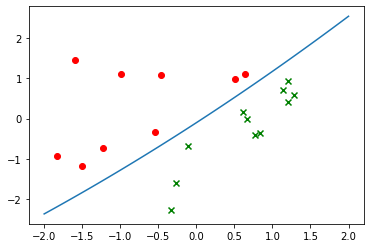

In [171]:
# 绘制决策边界  theta_0+theta_1*x1+theta_2*x2+theta_3*x1*x1 >= 0 是正类，否则负类
x1 = np.linspace(-2,2,100)
x2 = -(theta_0+theta_1*x1+theta_3*x1**2)/theta_2
plt.plot(x1,x2)
plt.scatter(train_x[train_y==0][:,0],train_x[train_y==0][:,1], c='red', marker='o')
plt.scatter(train_x[train_y==1][:,0],train_x[train_y==1][:,1], c='green', marker='x')